In [1]:
# import cell

import xarray as xr # to work with multi-dimensional arrays
import numpy as np # to work with multi-dimensional arrays
import pickle

import matplotlib
import matplotlib.pyplot as plt # for plotting
import matplotlib.colors as colors # for custom colourbars
import matplotlib.gridspec as gridspec # for more custom subplot positioning
import matplotlib.ticker as ticker # for custom tick label formatting
import cartopy # use for geographic map projections
import cartopy.crs as ccrs # use for geographic map projections
import regionmask # to work with IPCC sixth assessment regions

### Absolute Average Annual Tropical Nights: All Models

In [12]:
# load data for figure
experiment = 'ssp585'
abso_pw = f'/home/ucfagtj/DATA/Dissertation/Data/trop_nights/processed/{experiment}_abso_all_models.nc'
abso_data = xr.open_dataset(abso_pw)
abso_data.close()

Figure saved: /home/ucfagtj/DATA/Dissertation/figures/trop_nights/ssp585_abso_all_models.png


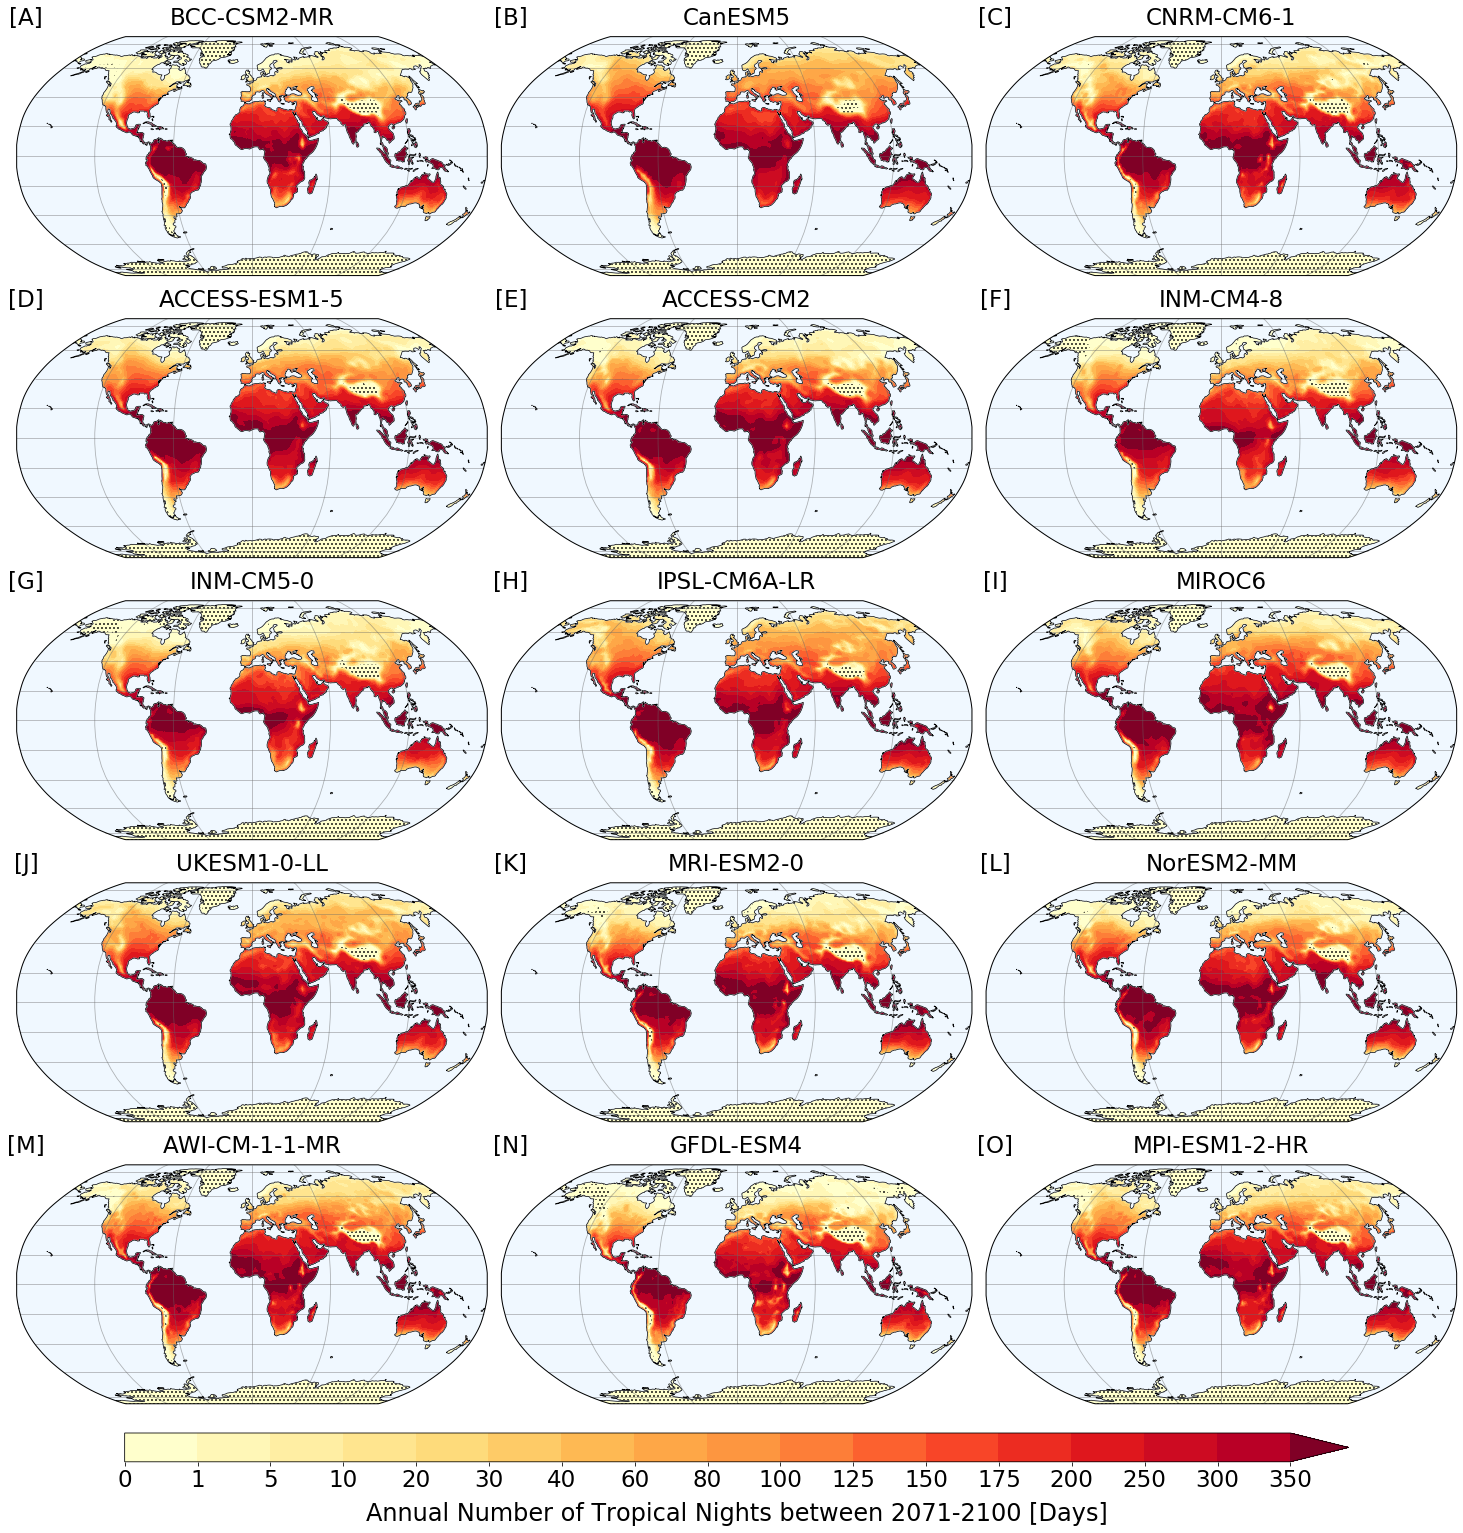

In [13]:
# define map projections and transformations
projection = ccrs.Robinson() # use Robinson projection
transform = ccrs.PlateCarree() # transform from PlateCarree projection

# define figure fontsizes
axis_title_fs = 24
plot_label_fs = 23
tick_label_fs = 23


########## figure plot base ##########


# create figure and axes objects
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (20, 20),
                         subplot_kw = {'projection': projection})
axes = axes.flatten(order = 'C') # flatten to a 1D array

# create subplot bases
titles = abso_data.model_index # define list of model names used
label = ['[A]', '[B]', '[C]', '[D]', '[E]', '[F]', '[G]', '[H]', '[I]', '[J]',
         '[K]', '[L]', '[M]', '[N]', '[O]']
for i, axs in enumerate(axes):
    axs.coastlines(color = 'black', resolution = '110m', lw = 0.7, zorder = 2)
    axs.gridlines(color = 'dimgrey', alpha = 0.5, zorder = 2)
    axs.add_feature(cartopy.feature.OCEAN, facecolor = 'aliceblue', zorder = 1)
    axs.set_title(titles[i], fontsize = plot_label_fs, pad = 12)
    axs.text(x = 0.02, y = 1.05, s = label[i], fontsize = plot_label_fs, 
             horizontalalignment = 'center', transform = axs.transAxes)
    
# adjust position of subplots to make space for a colourbar and reduce whitespacing
fig.subplots_adjust(bottom = 0.03, top = 1, left = 0., right = 1., wspace = 0.03, hspace = 0.05)


########## absolute mean annual tropical nights ##########


# define bounds to group data with; each bin will then be normalised and mapped to a specific colour
bnds1 = np.array([0, 1, 5, 10, 20, 30, 40, 60, 80, 100, 125, 150, 175, 200, 250, 300, 350, 400])
    
# create custom colourmap; obtain a list of RGB values for each colour to be mapped to
colour_list1 = plt.cm.get_cmap('YlOrRd', len(bnds1))
colours1 = colour_list1(np.arange(len(bnds1)))
colours1 = list(colours1)

# create custom colourmap; set colours of values exceeding contour levels set
cmap1 = colors.ListedColormap(colours1[0 :-1], '') # create colourmap object from specified colours
cmap1.set_over(colours1[-1]) # set colour of values exceeding upper contour value
norm1 = colors.BoundaryNorm(boundaries = bnds1,
                            ncolors = len(bnds1) - 1, # colours available to map too; out of bounds do not count
                            clip = False) 

# define the levels/contours for the subplots
lvls1 = np.array([0, 1, 5, 10, 20, 30, 40, 60, 80, 100, 125, 150, 175, 200, 250, 300, 350])

# map colourmap object to first model output; to be used in plot colour bar
cm1 = axes[0].contourf(abso_data.lon, abso_data.lat, abso_data.mean_ann_tn[0, :, :], # [model: lat: lon]
                       transform = transform, levels = lvls1, norm = norm1,
                       cmap = cmap1, extend = 'max')

# plot remaining model outputs
for i, axs in enumerate(axes[1: ]):
    axs.contourf(abso_data.lon, abso_data.lat, abso_data.mean_ann_tn[i + 1, :, :], # [model: lat: lon]
                 transform = transform, levels = lvls1, norm = norm1,
                 cmap = cmap1, extend = 'max')
    
# plot areas with data equal to 0 with hatches
for i, axs in enumerate(axes):
    axs.contourf(abso_data.lon, abso_data.lat, 
                 abso_data.mean_ann_tn[i, :, :].where(abso_data.mean_ann_tn[i, :, :] == 0, 1), # non zero values = 0
                 transform = transform, alpha = 0, # set plot completely transparent
                 levels = np.array([0, 1]), extend = 'both', hatches = ['...', None]) # 0 hatched, 1 not
    
# add colourbar
cb_axs1 = fig.add_axes([0.075, 0., 0.85, 0.02]) # add an axes to plot colourbar on; [left, bottom, width, height]
cbar1 = fig.colorbar(cm1, cax = cb_axs1, extend = 'max',
                     orientation = 'horizontal', ticks = lvls1)
cbar1.ax.tick_params(labelsize = tick_label_fs)
cbar1.set_label(label = f'Annual Number of Tropical Nights {abso_data.period[0: 4]}-' + \
                        f'{abso_data.period[7: ]} [days]',
                fontsize = axis_title_fs, rotation = 0, labelpad = 10)


########## save figure ##########


# save figure
save_pw = '/home/ucfagtj/DATA/Dissertation/figures/trop_nights/' + \
          f'{experiment}_{abso_data.data_type[0: 4]}_all_models.png'
print(f'Figure saved: {save_pw}')
fig.savefig(save_pw, bbox_inches = 'tight', pad_inches = 0.1)

### Average Annual Tropical Nights Anomaly (Pre-Ind.): All Models

In [17]:
# load data for figure
experiment = 'ssp585'
anom_pw = f'/home/ucfagtj/DATA/Dissertation/Data/trop_nights/processed/{experiment}_anom_all_models.nc'
anom_data = xr.open_dataset(anom_pw)
anom_data.close()

Figure saved: /home/ucfagtj/DATA/Dissertation/figures/trop_nights/current_anom_all_models.png


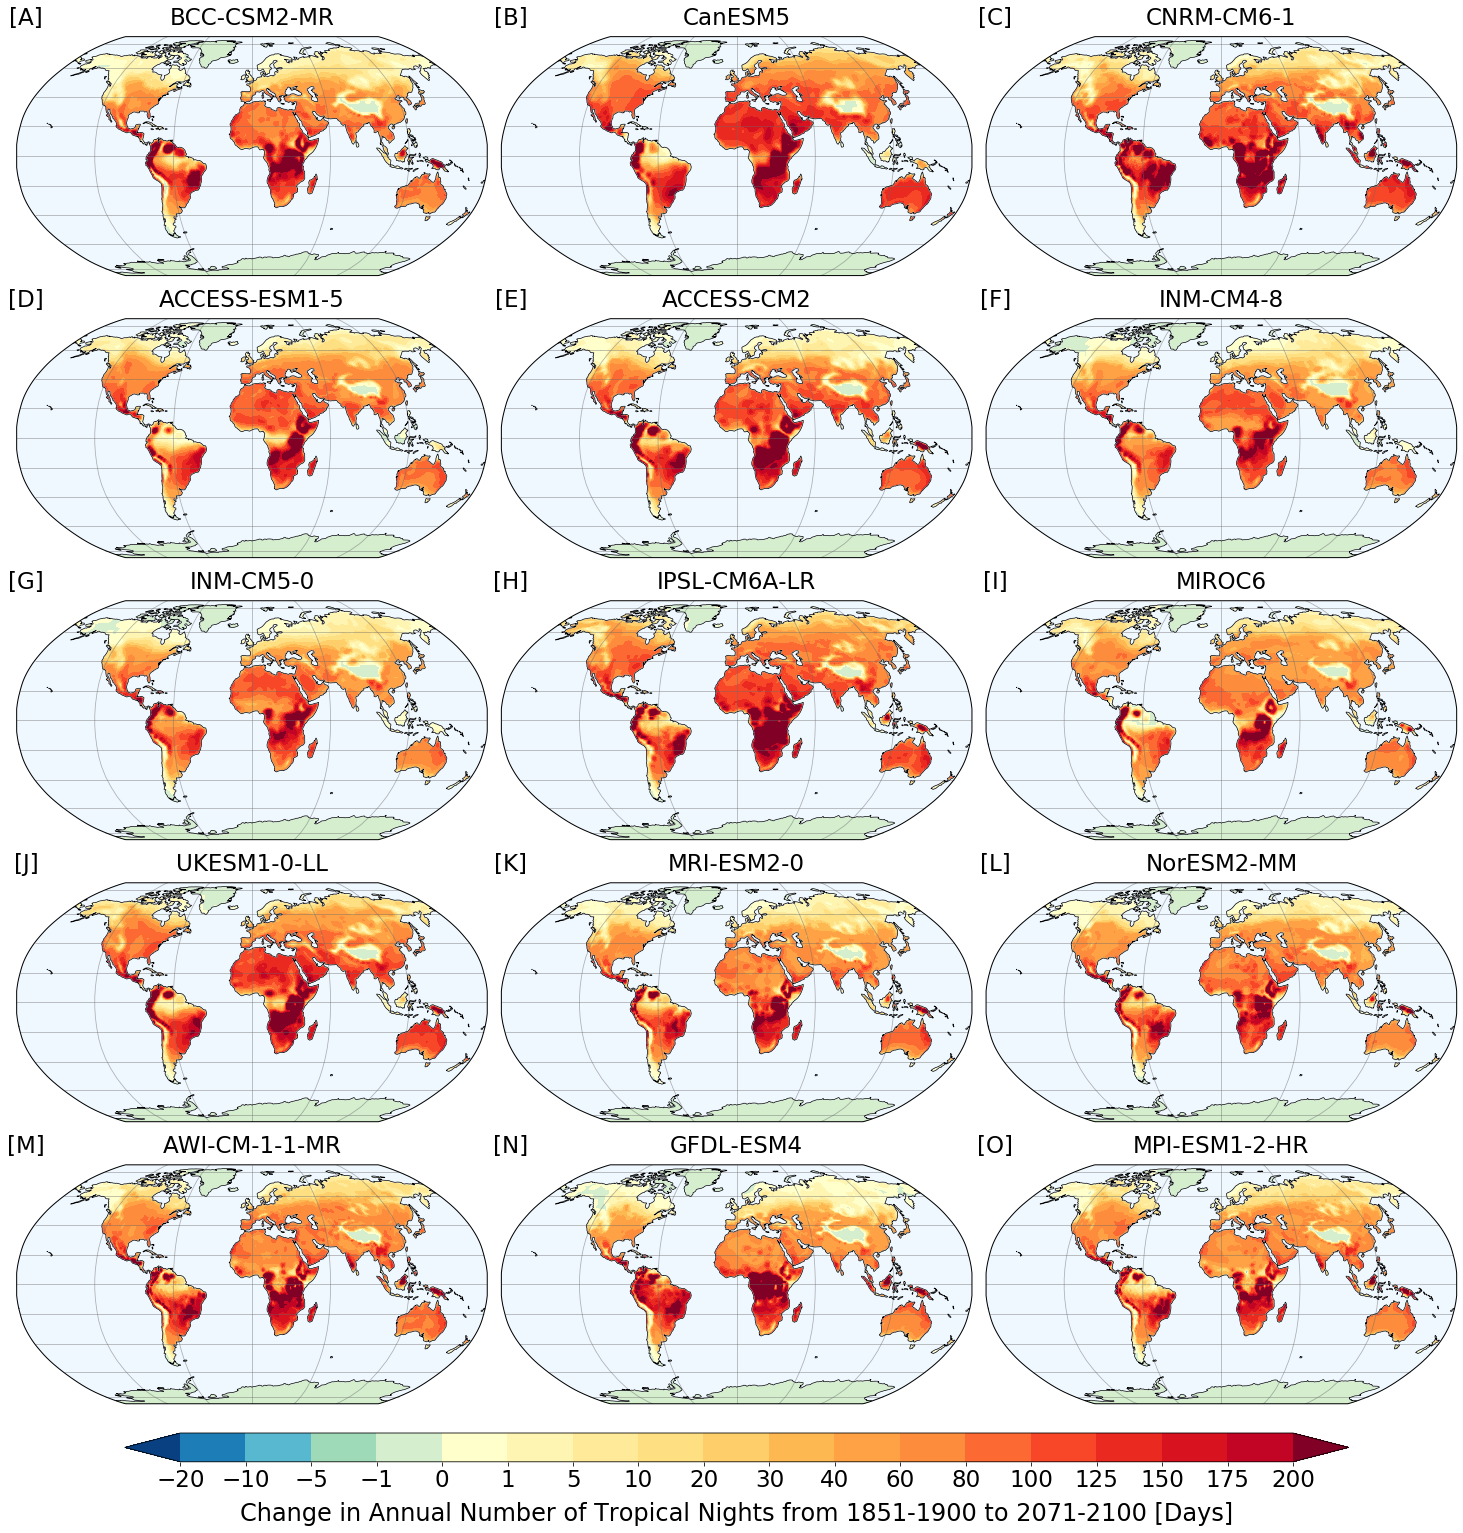

In [35]:
# define map projections and transformations
projection = ccrs.Robinson() # use Robinson projection
transform = ccrs.PlateCarree() # transform from PlateCarree projection

# define figure fontsizes
axis_title_fs = 24
plot_label_fs = 23
tick_label_fs = 23


########## figure plot base ##########


# create figure and axes objects
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (20, 20),
                         subplot_kw = {'projection': projection})
axes = axes.flatten(order = 'C') # flatten to a 1D array

# create subplot bases
titles = anom_data.model_index # define list of model names used
label = ['[A]', '[B]', '[C]', '[D]', '[E]', '[F]', '[G]', '[H]', '[I]', '[J]',
         '[K]', '[L]', '[M]', '[N]', '[O]']
for i, axs in enumerate(axes):
    axs.coastlines(color = 'black', resolution = '110m', lw = 0.7, zorder = 2)
    axs.gridlines(color = 'dimgrey', alpha = 0.5, zorder = 2)
    axs.add_feature(cartopy.feature.OCEAN, facecolor = 'aliceblue', zorder = 1)
    axs.set_title(titles[i], fontsize = plot_label_fs, pad = 12)
    axs.text(x = 0.02, y = 1.05, s = label[i], fontsize = plot_label_fs, 
             horizontalalignment = 'center', transform = axs.transAxes)
    
# adjust position of subplots to make space for a colourbar and reduce whitespacing
fig.subplots_adjust(bottom = 0.03, top = 1, left = 0., right = 1., wspace = 0.03, hspace = 0.05)


########## mean annual tropical nights anomaly ##########


# define bounds to group data with; each bin will then be normalised and mapped to a specific colour
bnds1 = np.array([-100, -20, -10, -5, -1, 0, 1, 5, 10, 20, 30, 40, 60, 80, 100, 125, 150, 175, 200, 400])

# count number of negative and postive bound values
neg_bnds1 = sum(1 for i in bnds1 if i < 0)
pos_bnds1 = len(bnds1) - neg_bnds1

# create custom colourmap; obtain a list of RGB values for each colour to be mapped to
pos_colour_list1 = plt.cm.get_cmap('YlOrRd', pos_bnds1)
neg_colour_list1 = plt.cm.get_cmap('GnBu_r', neg_bnds1 + 1) # so can exclude additional colour to match 
colours1 = np.vstack((neg_colour_list1(np.arange(neg_bnds1 + 1))[: -1], # exclude additional colour
                      pos_colour_list1(np.arange(pos_bnds1))))
colours1 = list(colours1)

# create custom colourmap; set colours of values exceeding contour levels set
cmap1 = colors.ListedColormap(colours1[1 :-1], '') # create colourmap object from specified colours
cmap1.set_over(colours1[-1]) # set colour of values exceeding upper contour value
cmap1.set_under(colours1[0]) # set colours of values exceeding lower contour value
norm1 = colors.BoundaryNorm(boundaries = bnds1,
                            ncolors = len(bnds1) - 2, # colours available to map too; out of bounds do not count
                            clip = False) 

# define the levels/contours for the subplots
lvls1 = np.array([-20, -10, -5, -1, 0, 1, 5, 10, 20, 30, 40, 60, 80, 100, 125, 150, 175, 200])

# map colourmap object to first model output; to be used in plot colour bar
cm1 = axes[0].contourf(anom_data.lon, anom_data.lat, anom_data.mean_ann_tn_anom[0, :, :], # [model: lat: lon]
                       transform = transform, levels = lvls1, norm = norm1,
                       cmap = cmap1, extend = 'both')

# plot remaining model outputs
for i, axs in enumerate(axes[1: ]):
    axs.contourf(anom_data.lon, anom_data.lat, anom_data.mean_ann_tn_anom[i + 1, :, :], # [model: lat: lon]
                 transform = transform, levels = lvls1, norm = norm1,
                 cmap = cmap1, extend = 'both')

# plot areas with data equal to 0 with hatches
for i, axs in enumerate(axes):
    axs.contourf(anom_data.lon, anom_data.lat, 
                 anom_data.mean_ann_tn_anom[i, :, :].where(anom_data.mean_ann_tn_anom[i, :, :] == 0, 1),
                 transform = transform, alpha = 0, # set plot completely transparent
                 levels = np.array([0, 1]), extend = 'both', hatches = ['...', None]) # 0 hatched, 1 not
    
# add colourbar
cb_axs1 = fig.add_axes([0.075, 0., 0.85, 0.02]) # add an axes to plot colourbar on; [left, bottom, width, height]
cbar1 = fig.colorbar(cm1, cax = cb_axs1, extend = 'both',
                     orientation = 'horizontal', ticks = lvls1)
cbar1.ax.tick_params(labelsize = tick_label_fs)
cbar1.set_label(label = f'Change in Annual Number of Tropical Nights from 1851-1900 to {anom_data.period[0: 4]}-' + \
                        f'{anom_data.period[7: ]} [days]',
                fontsize = axis_title_fs, rotation = 0, labelpad = 10)


########## save figure ##########


# save figure
save_pw = '/home/ucfagtj/DATA/Dissertation/figures/trop_nights/' + \
          f'{experiment}_{anom_data.data_type[0: 4]}_all_models.png'
print(f'Figure saved: {save_pw}')
fig.savefig(save_pw, bbox_inches = 'tight', pad_inches = 0.1)

### Inter-Annual Variability in Annual Tropical Nights: All Models

In [19]:
# load data for figure
experiment = 'current'
abso_pw = f'/home/ucfagtj/DATA/Dissertation/Data/trop_nights/processed/{experiment}_abso_all_models.nc'
abso_data = xr.open_dataset(abso_pw)
abso_data.close()

Figure saved: /home/ucfagtj/DATA/Dissertation/figures/trop_nights/current_abso_inter_ann_tn_var_all_models.png


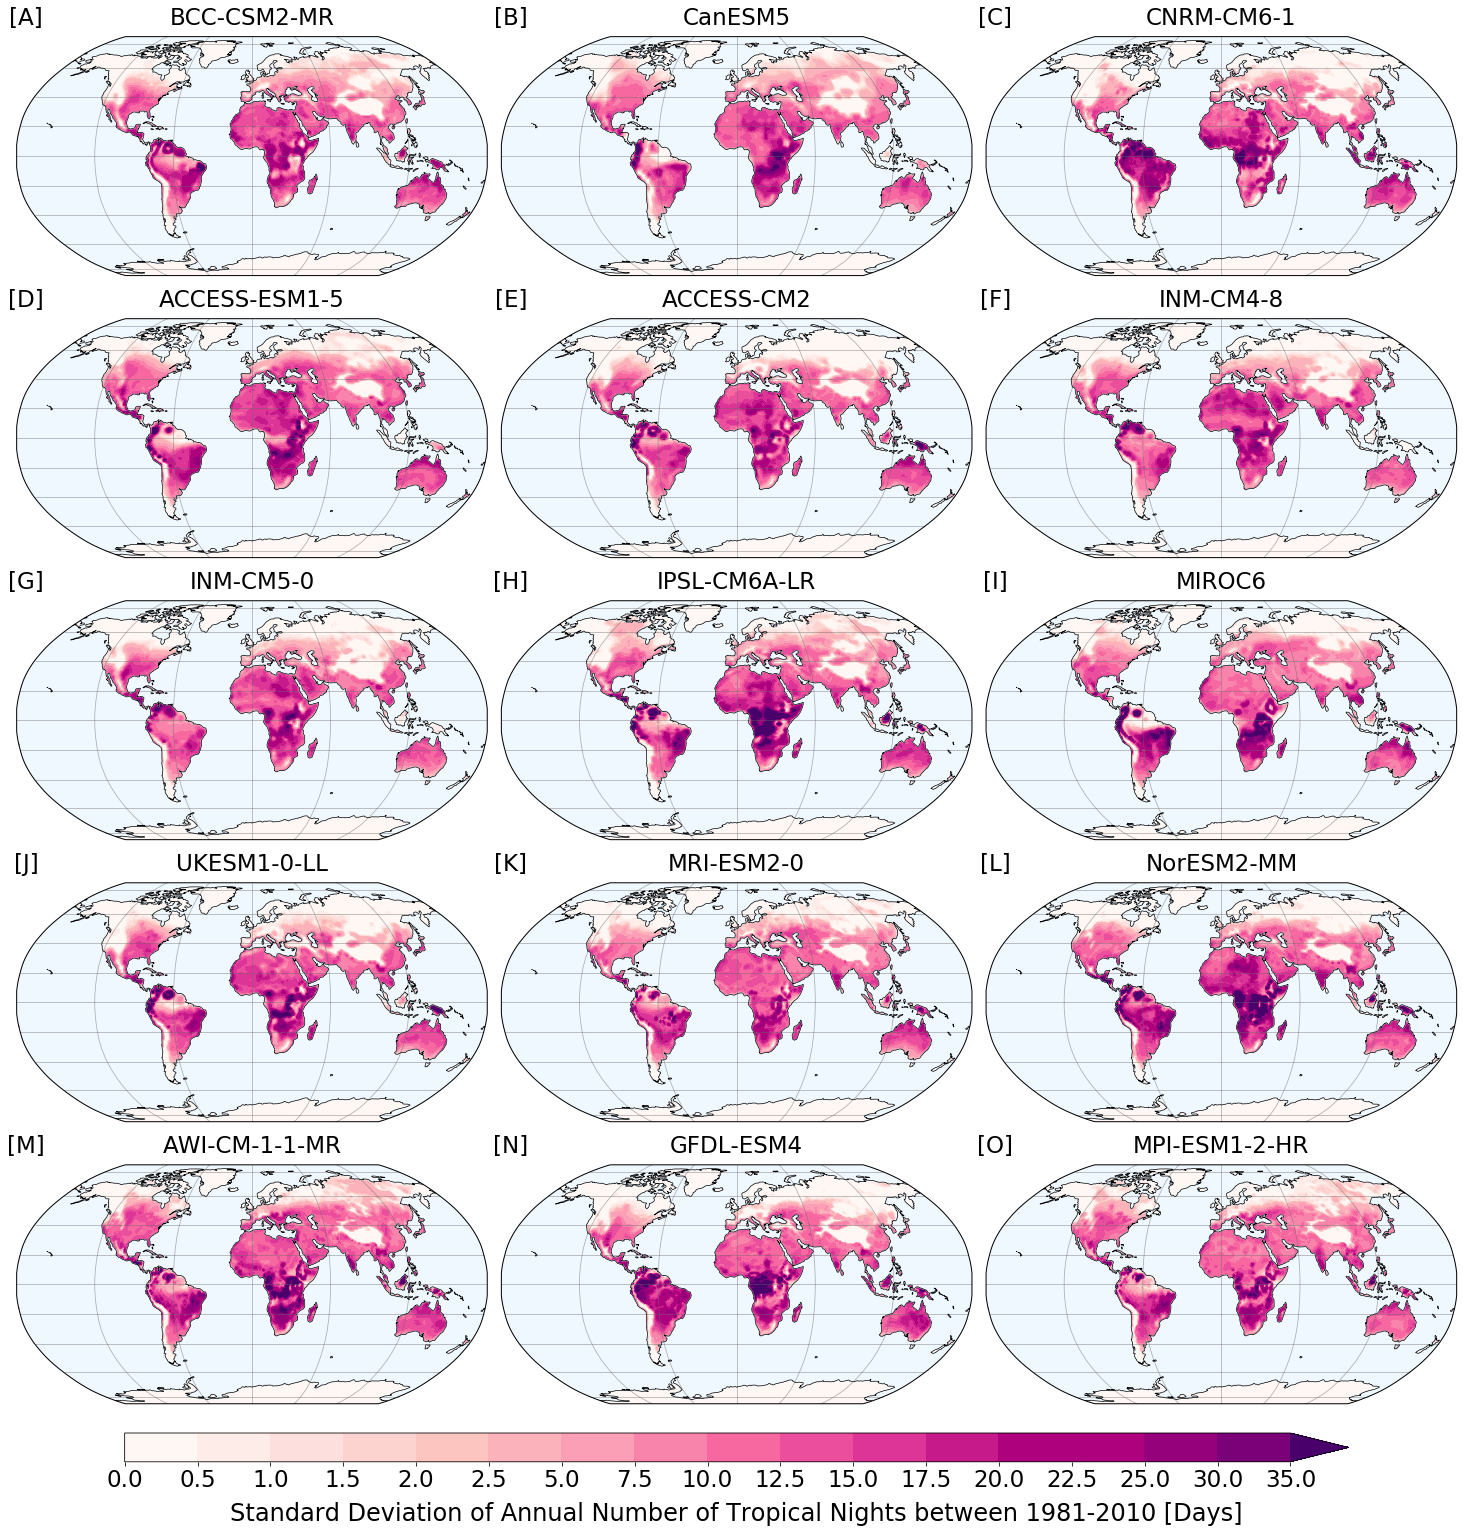

In [25]:
# define map projections and transformations
projection = ccrs.Robinson() # use Robinson projection
transform = ccrs.PlateCarree() # transform from PlateCarree projection

# define figure fontsizes
axis_title_fs = 24
plot_label_fs = 23
tick_label_fs = 23


########## figure plot base ##########


# create figure and axes objects
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (20, 20),
                         subplot_kw = {'projection': projection})
axes = axes.flatten(order = 'C') # flatten to a 1D array

# create subplot bases
titles = abso_data.model_index # define list of model names used
label = ['[A]', '[B]', '[C]', '[D]', '[E]', '[F]', '[G]', '[H]', '[I]', '[J]',
         '[K]', '[L]', '[M]', '[N]', '[O]']
for i, axs in enumerate(axes):
    axs.coastlines(color = 'black', resolution = '110m', lw = 0.7, zorder = 2)
    axs.gridlines(color = 'dimgrey', alpha = 0.5, zorder = 2)
    axs.add_feature(cartopy.feature.OCEAN, facecolor = 'aliceblue', zorder = 1)
    axs.set_title(titles[i], fontsize = plot_label_fs, pad = 12)
    axs.text(x = 0.02, y = 1.05, s = label[i], fontsize = plot_label_fs, 
             horizontalalignment = 'center', transform = axs.transAxes)
    
# adjust position of subplots to make space for a colourbar and reduce whitespacing
fig.subplots_adjust(bottom = 0.03, top = 1, left = 0., right = 1., wspace = 0.03, hspace = 0.05)


########## standard deviation of mean annual tropical nights ##########


# define bounds to group data with; each bin will then be normalised and mapped to a specific colour
bnds1 = np.array([0., 0.5, 1.0, 1.5, 2.0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 20.0, 25.0, 30.0, 35.0, 100])

# create custom colourmap; obtain a list of RGB values for each colour to be mapped to
colour_list1 = plt.cm.get_cmap('RdPu', len(bnds1))
colours1 = colour_list1(np.arange(len(bnds1)))
colours1 = list(colours1)

# create custom colourmap; set colours of values exceeding contour levels set
cmap1 = colors.ListedColormap(colours1[0 :-1], '') # create colourmap object from specified colours
cmap1.set_over(colours1[-1]) # set colour of values exceeding upper contour value
norm1 = colors.BoundaryNorm(boundaries = bnds1,
                            ncolors = len(bnds1) - 1, # colours available to map too; out of bounds do not count
                            clip = False)

# define the levels/contours for the subplots
lvls1 = np.array([0., 0.5, 1.0, 1.5, 2.0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 20.0,
                  22.5, 25.0, 30.0, 35.0])

# map colourmap object to first model output; to be used in plot colour bar
cm1 = axes[0].contourf(abso_data.lon, abso_data.lat, abso_data.std_ann_tn[0, :, :], # [model: lat: lon]
                       transform = transform, levels = lvls1, norm = norm1,
                       cmap = cmap1, extend = 'max')

# plot remaining model outputs
for i, axs in enumerate(axes[1: ]):
    axs.contourf(abso_data.lon, abso_data.lat, abso_data.std_ann_tn[i + 1, :, :], # [model: lat: lon]
                 transform = transform, levels = lvls1, norm = norm1,
                 cmap = cmap1, extend = 'max')
    
# add colourbar
cb_axs1 = fig.add_axes([0.075, 0., 0.85, 0.02]) # add an axes to plot colourbar on; [left, bottom, width, height]
cbar1 = fig.colorbar(cm1, cax = cb_axs1, extend = 'max',
                     orientation = 'horizontal', ticks = lvls1)
cbar1.ax.tick_params(labelsize = tick_label_fs)
cbar1.set_label(label = 'Standard Deviation of Annual Number of Tropical Nights between ' + \
                f'{abso_data.period[0: 4]}-{abso_data.period[7: ]} [Days]',
                fontsize = axis_title_fs, rotation = 0, labelpad = 10)


########## save figure ##########


# save figure
save_pw = '/home/ucfagtj/DATA/Dissertation/figures/trop_nights/' + \
          f'{experiment}_{abso_data.data_type[0: 4]}_inter_ann_tn_var_all_models.png'
print(f'Figure saved: {save_pw}')
fig.savefig(save_pw, bbox_inches = 'tight', pad_inches = 0.1)

### Average Annual Number of Tropical Nights: Multi-Model Ensemble

In [2]:
# load data for figure
ens_pw = f'/home/ucfagtj/DATA/Dissertation/Data/trop_nights/processed/ensemble_trop_nights.nc'
ens_data = xr.open_dataset(ens_pw)
ens_data.close()

Figure saved: /home/ucfagtj/DATA/Dissertation/figures/trop_nights/multi_model_ensemble_abso_and_anom_and_std.png


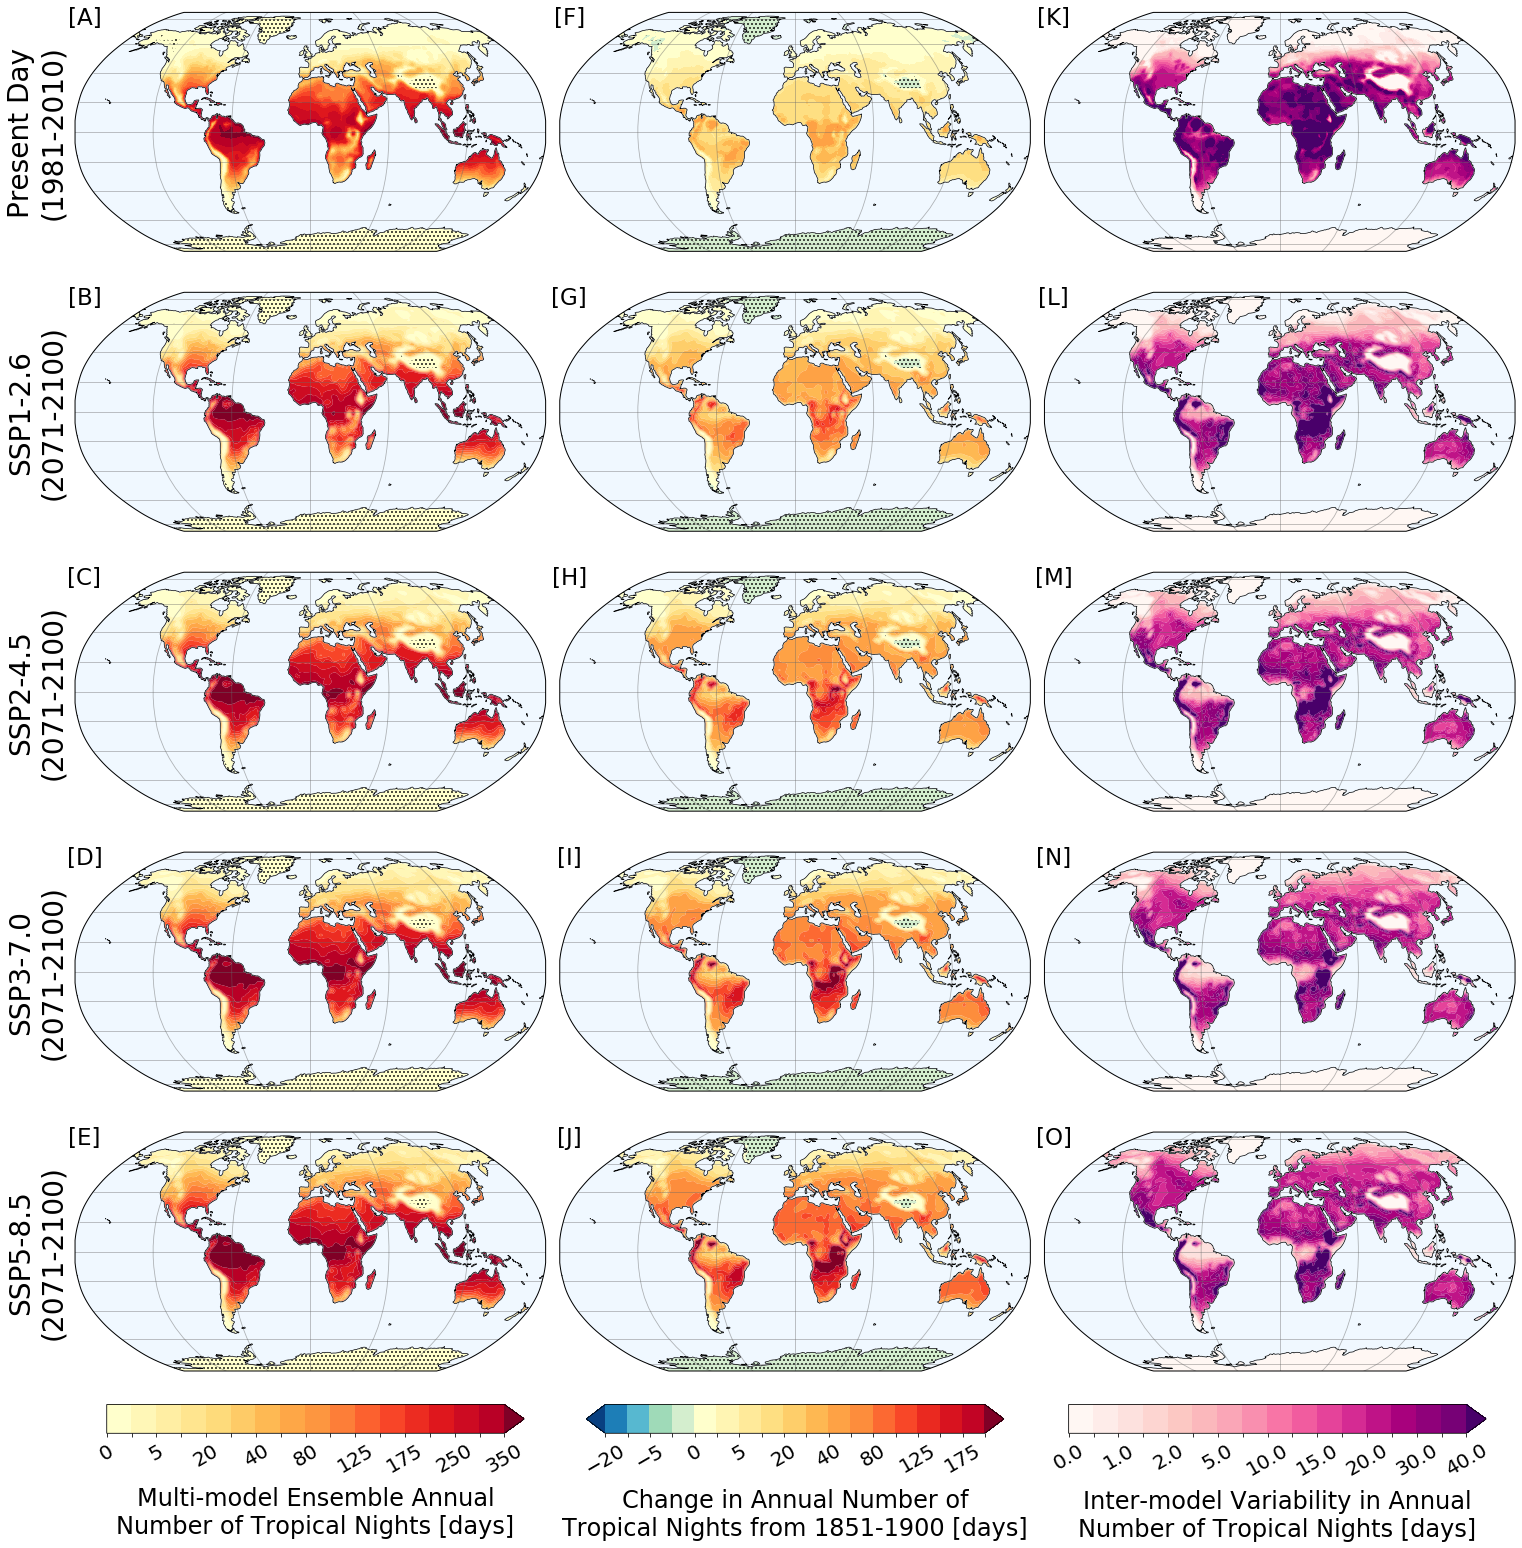

In [3]:
# define map projections and transformations
projection = ccrs.Robinson() # use Robinson projection
transform = ccrs.PlateCarree() # transform from PlateCarree projection

# define figure fontsizes
axis_title_fs = 24
plot_header_fs = 28
plot_label_fs = 23
tick_label_fs = 20


########## figure plot base ##########


# create figure and axes objects
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (20, 20),
                         subplot_kw = {'projection': projection})
axes = axes.flatten(order = 'F')
col1, col2, col3 = axes[0: 5], axes[5: 10], axes[10: 15]
titles = ['Present Day', 'SSP1-2.6', 'SSP2-4.5', 'SSP3-7.0', 'SSP5-8.5']
periods = ['1981-2010', '2071-2100', '2071-2100', '2071-2100', '2071-2100']
label = ['[A]', '[B]', '[C]', '[D]', '[E]', '[F]', '[G]', '[H]', '[I]', '[J]', '[K]', '[L]',
         '[M]', '[N]', '[O]', '[P]', '[Q]', '[R]']

# create subplot bases
for i, axs in enumerate(axes):
    axs.coastlines(color = 'black', resolution = '110m', lw = 0.7, zorder = 2)
    axs.gridlines(color = 'dimgrey', alpha = 0.5, zorder = 2)
    axs.add_feature(cartopy.feature.OCEAN, facecolor = 'aliceblue', zorder = 1)
    axs.text(x = 0.02, y = 0.95, s = label[i], fontsize = plot_label_fs,
             horizontalalignment = 'center', transform = axs.transAxes)
for i, axs in enumerate(axes[0: 5]):
    axs.text(x = -0.08, y = 0.5, s = f'{titles[i]}\n({periods[i]})', fontsize = plot_header_fs,
             verticalalignment = 'center', horizontalalignment = 'center', rotation = 'vertical',
             transform = axs.transAxes, weight = 'normal')
    
# adjust position of subplots to make space for colourbars beneath and reduce whitespacing
fig.subplots_adjust(bottom = 0.03, top = 1, left = 0., right = 1., wspace = 0.03, hspace = 0.01)

# create a list of variable basenames; makes plotting simpler later
mean_base = [f'{x}_mean_ann_tn_' for x in ['current', 'ssp126', 'ssp245', 'ssp370', 'ssp585']]
std_base = [f'{x}_std_ann_tn_' for x in ['current', 'ssp126', 'ssp245', 'ssp370', 'ssp585']]


########## column 1: absolute mean annual tropical nights ##########


# define bounds to group data with; each bin will then be normalised and mapped to a specific colour
bnds1 = np.array([0, 1, 5, 10, 20, 30, 40, 60, 80, 100, 125, 150, 175, 200, 250, 300, 350, 400])

# create custom colourmap; obtain a list of RGB values for each colour to be mapped to
colour_list1 = plt.cm.get_cmap('YlOrRd', len(bnds1))
colours1 = list(colour_list1(np.arange(len(bnds1))))

# create custom colourmap; set colours of values exceeding contour levels set
cmap1 = colors.ListedColormap(colours1[0 :-1], '') # create colourmap object from specified colours
cmap1.set_over(colours1[-1]) # set colour of values exceeding upper contour value
norm1 = colors.BoundaryNorm(boundaries = bnds1,
                            ncolors = len(bnds1) - 1, # colours available to map too; out of bounds do not count
                            clip = False) 

# define the levels/contours for the subplots
lvls1 = np.array([0, 1, 5, 10, 20, 30, 40, 60, 80, 100, 125, 150, 175, 200, 250, 300, 350])

# map colourmap object to first output; to be used to plot colour bar
cm1 = col1[0].contourf(ens_data.lon, ens_data.lat, ens_data[f'{mean_base[0]}abso'],
                       transform = transform, levels = lvls1, norm = norm1,
                       cmap = cmap1, extend = 'max')

# plot remaining outputs
for i, axs in enumerate(col1[1: ]):
    axs.contourf(ens_data.lon, ens_data.lat, ens_data[f'{mean_base[i + 1]}abso'],
                 transform = transform, levels = lvls1, norm = norm1,
                 cmap = cmap1, extend = 'max',
                 antialiased = True,
                 alpha = 1)

# plot areas with data equal to 0 with hatches
for i, axs in enumerate(col1):
    axs.contourf(ens_data.lon, ens_data.lat, 
                 ens_data[f'{mean_base[i]}abso'].where(ens_data[f'{mean_base[i]}abso'] == 0, 1), # non zero values = 0
                 transform = transform, alpha = 0, # set plot completely transparent
                 levels = np.array([0, 1]), extend = 'both', hatches = ['...', None]) # 0 hatched, 1 not

# add colourbar
cb_axs1 = fig.add_axes([0.022, 0., 0.29, 0.02]) # add an axes to plot colourbar on; [left, bottom, width, height]
cbar1 = fig.colorbar(cm1, cax = cb_axs1, extend = 'max', orientation = 'horizontal',
                     ticks = lvls1)
cbar1.ax.tick_params(labelsize = tick_label_fs, labelrotation = 30)
cbar1.set_label(label = 'Multi-model Ensemble Annual\nNumber of Tropical Nights [days]',
                fontsize = axis_title_fs, rotation = 0, labelpad = 10)
for label in cbar1.ax.xaxis.get_ticklabels()[1: : 2]: # set only one in two tick labels visible
    label.set_visible(False)


########## column 2: mean annual tropical anomaly relative to the pre-industrial ##########


# define bounds to group data with; each bin will then be normalised and mapped to a specific colour
bnds2 = np.array([-100, -20, -10, -5, -1, 0, 1, 5, 10, 20, 30, 40, 60, 80, 100, 125, 150, 175, 200, 400])

# count number of negative and postive bound values
neg_bnds2 = sum(1 for i in bnds2 if i < 0)
pos_bnds2 = len(bnds2) - neg_bnds2

# create custom colourmap; obtain a list of RGB values for each colour to be mapped to
pos_colour_list2 = plt.cm.get_cmap('YlOrRd', pos_bnds2)
neg_colour_list2 = plt.cm.get_cmap('GnBu_r', neg_bnds2 + 1) # so can exclude additional colour to match 
colours2 = np.vstack((neg_colour_list2(np.arange(neg_bnds2 + 1))[: -1], # exclude additional colour
                      pos_colour_list2(np.arange(pos_bnds2))))
colours2 = list(colours2)

# create custom colourmap; set colours of values exceeding contour levels set
cmap2 = colors.ListedColormap(colours2[1 :-1], '') # create colourmap object from specified colours
cmap2.set_over(colours2[-1]) # set colour of values exceeding upper contour value
cmap2.set_under(colours2[0]) # set colours of values exceeding lower contour value
norm2 = colors.BoundaryNorm(boundaries = bnds2,
                            ncolors = len(bnds2) - 2, # colours available to map too; out of bounds do not count
                            clip = False) 

# define the levels/contours for the subplots
lvls2 = np.array([-20, -10, -5, -1, 0, 1, 5, 10, 20, 30, 40, 60, 80, 100, 125, 150, 175, 200])

# map colourmap object to first model output; to be used in plot colour bar
cm2 = col2[0].contourf(ens_data.lon, ens_data.lat, ens_data[f'{mean_base[0]}anom'],
                       transform = transform, levels = lvls2, norm = norm2,
                       cmap = cmap2, extend = 'both')

# plot remaining model outputs
for i, axs in enumerate(col2[1: ]):
    axs.contourf(ens_data.lon, ens_data.lat, ens_data[f'{mean_base[i + 1]}anom'],
                 transform = transform, levels = lvls2, norm = norm2,
                 cmap = cmap2, extend = 'both',
                 antialiased = True, alpha = 1)
    
# plot areas with data equal to 0 with hatches
for i, axs in enumerate(col2):
    axs.contourf(ens_data.lon, ens_data.lat, 
                 ens_data[f'{mean_base[i]}anom'].where(ens_data[f'{mean_base[i]}anom'] == 0, 1),
                 transform = transform, alpha = 0, # set plot completely transparent
                 levels = np.array([0, 1]), extend = 'both', hatches = ['...', None]) # 0 hatched, 1 not

# add colourbar
cb_axs2 = fig.add_axes([0.355, 0., 0.29, 0.02]) # add an axes to plot colourbar on; [left, bottom, width, height]
cbar2 = fig.colorbar(cm2, cax = cb_axs2, extend = 'both', orientation = 'horizontal', ticks = lvls2)
cbar2.ax.tick_params(labelsize = tick_label_fs, labelrotation = 30)
cbar2.set_label(label = f'Change in Annual Number of\nTropical Nights from 1851-1900 [days]',
                fontsize = axis_title_fs, rotation = 0, labelpad = 10)
for label in cbar2.ax.xaxis.get_ticklabels()[1: : 2]: # set only one in two tick labels visible
    label.set_visible(False)


########## column 3: standard deviation of model mean annual number of tropical nights ##########


# define bounds to group data with; each bin will then be normalised and mapped to a specific colour
bnds3 = np.array([0., 0.5, 1.0, 1.5, 2.0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 20.0, 25.0, 30.0, 35.0, 40.0, 100])

# create custom colourmap; obtain a list of RGB values for each colour to be mapped to
colour_list3 = plt.cm.get_cmap('RdPu', len(bnds3))
colours3 = colour_list3(np.arange(len(bnds3)))
colours3 = list(colours3)
                      
# create custom colourmap; set colours of values exceeding contour levels set
cmap3 = colors.ListedColormap(colours3[0 :-1], '') # create colourmap object from specified colours
cmap3.set_over(colours3[-1]) # set colour of values exceeding upper contour value
norm3 = colors.BoundaryNorm(boundaries = bnds3,
                            ncolors = len(bnds3) - 1, # colours available to map too; out of bounds do not count
                            clip = False) 

# define the levels/contours for the subplots
lvls3 = np.array([0., 0.5, 1.0, 1.5, 2.0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 20.0, 25.0, 30.0, 35.0, 40.0])

# map colourmap object to first model output; to be used in plot colour bar
cm3 = col3[0].contourf(ens_data.lon, ens_data.lat, ens_data[f'{std_base[0]}abso'],
                       transform = transform, levels = lvls3, norm = norm3,
                       cmap = cmap3, extend = 'max')

# plot remaining model outputs
for i, axs in enumerate(col3[1: ]):
    axs.contourf(ens_data.lon, ens_data.lat, ens_data[f'{std_base[i + 1]}abso'],
                 transform = transform, levels = lvls3, norm = norm3,
                 cmap = cmap3, extend = 'max',
                 antialiased = True, alpha = 1)

# add colourbar
cb_axs3 = fig.add_axes([0.69, 0., 0.29, 0.02]) # add an axes to plot colourbar on; [left, bottom, width, height]
cbar3 = fig.colorbar(cm3, cax = cb_axs3, extend = 'both', orientation = 'horizontal', ticks = lvls3)
cbar3.ax.tick_params(labelsize = tick_label_fs, labelrotation = 30)
cbar3.set_label(label = 'Inter-model Variability in Annual\nNumber of Tropical Nights [days]',
                fontsize = axis_title_fs, rotation = 0, labelpad = 10)
for label in cbar3.ax.xaxis.get_ticklabels()[1: : 2]: # set only one in two tick labels visible
    label.set_visible(False)
    
    
########## save figure ##########


# save figure
save_pw = '/home/ucfagtj/DATA/Dissertation/figures/trop_nights/multi_model_ensemble_abso_and_anom_and_std.png'
print(f'Figure saved: {save_pw}')
fig.savefig(save_pw, bbox_inches = 'tight', pad_inches = 0.1)

### Absolute Mean Annual Number of Tropical Nights: Multi-Model Ensemble Regional Breakdown

In [4]:
# load data for figure
srex_pw = f'/home/ucfagtj/DATA/Dissertation/Data/trop_nights/processed/ensemble_trop_nights_variables_AR6.pickle'
unpickle = open(srex_pw, 'rb')
ar6_df = pickle.load(unpickle)

Figure saved: /home/ucfagtj/DATA/Dissertation/figures/trop_nights/regional_absolute_ann_trop_nights.png


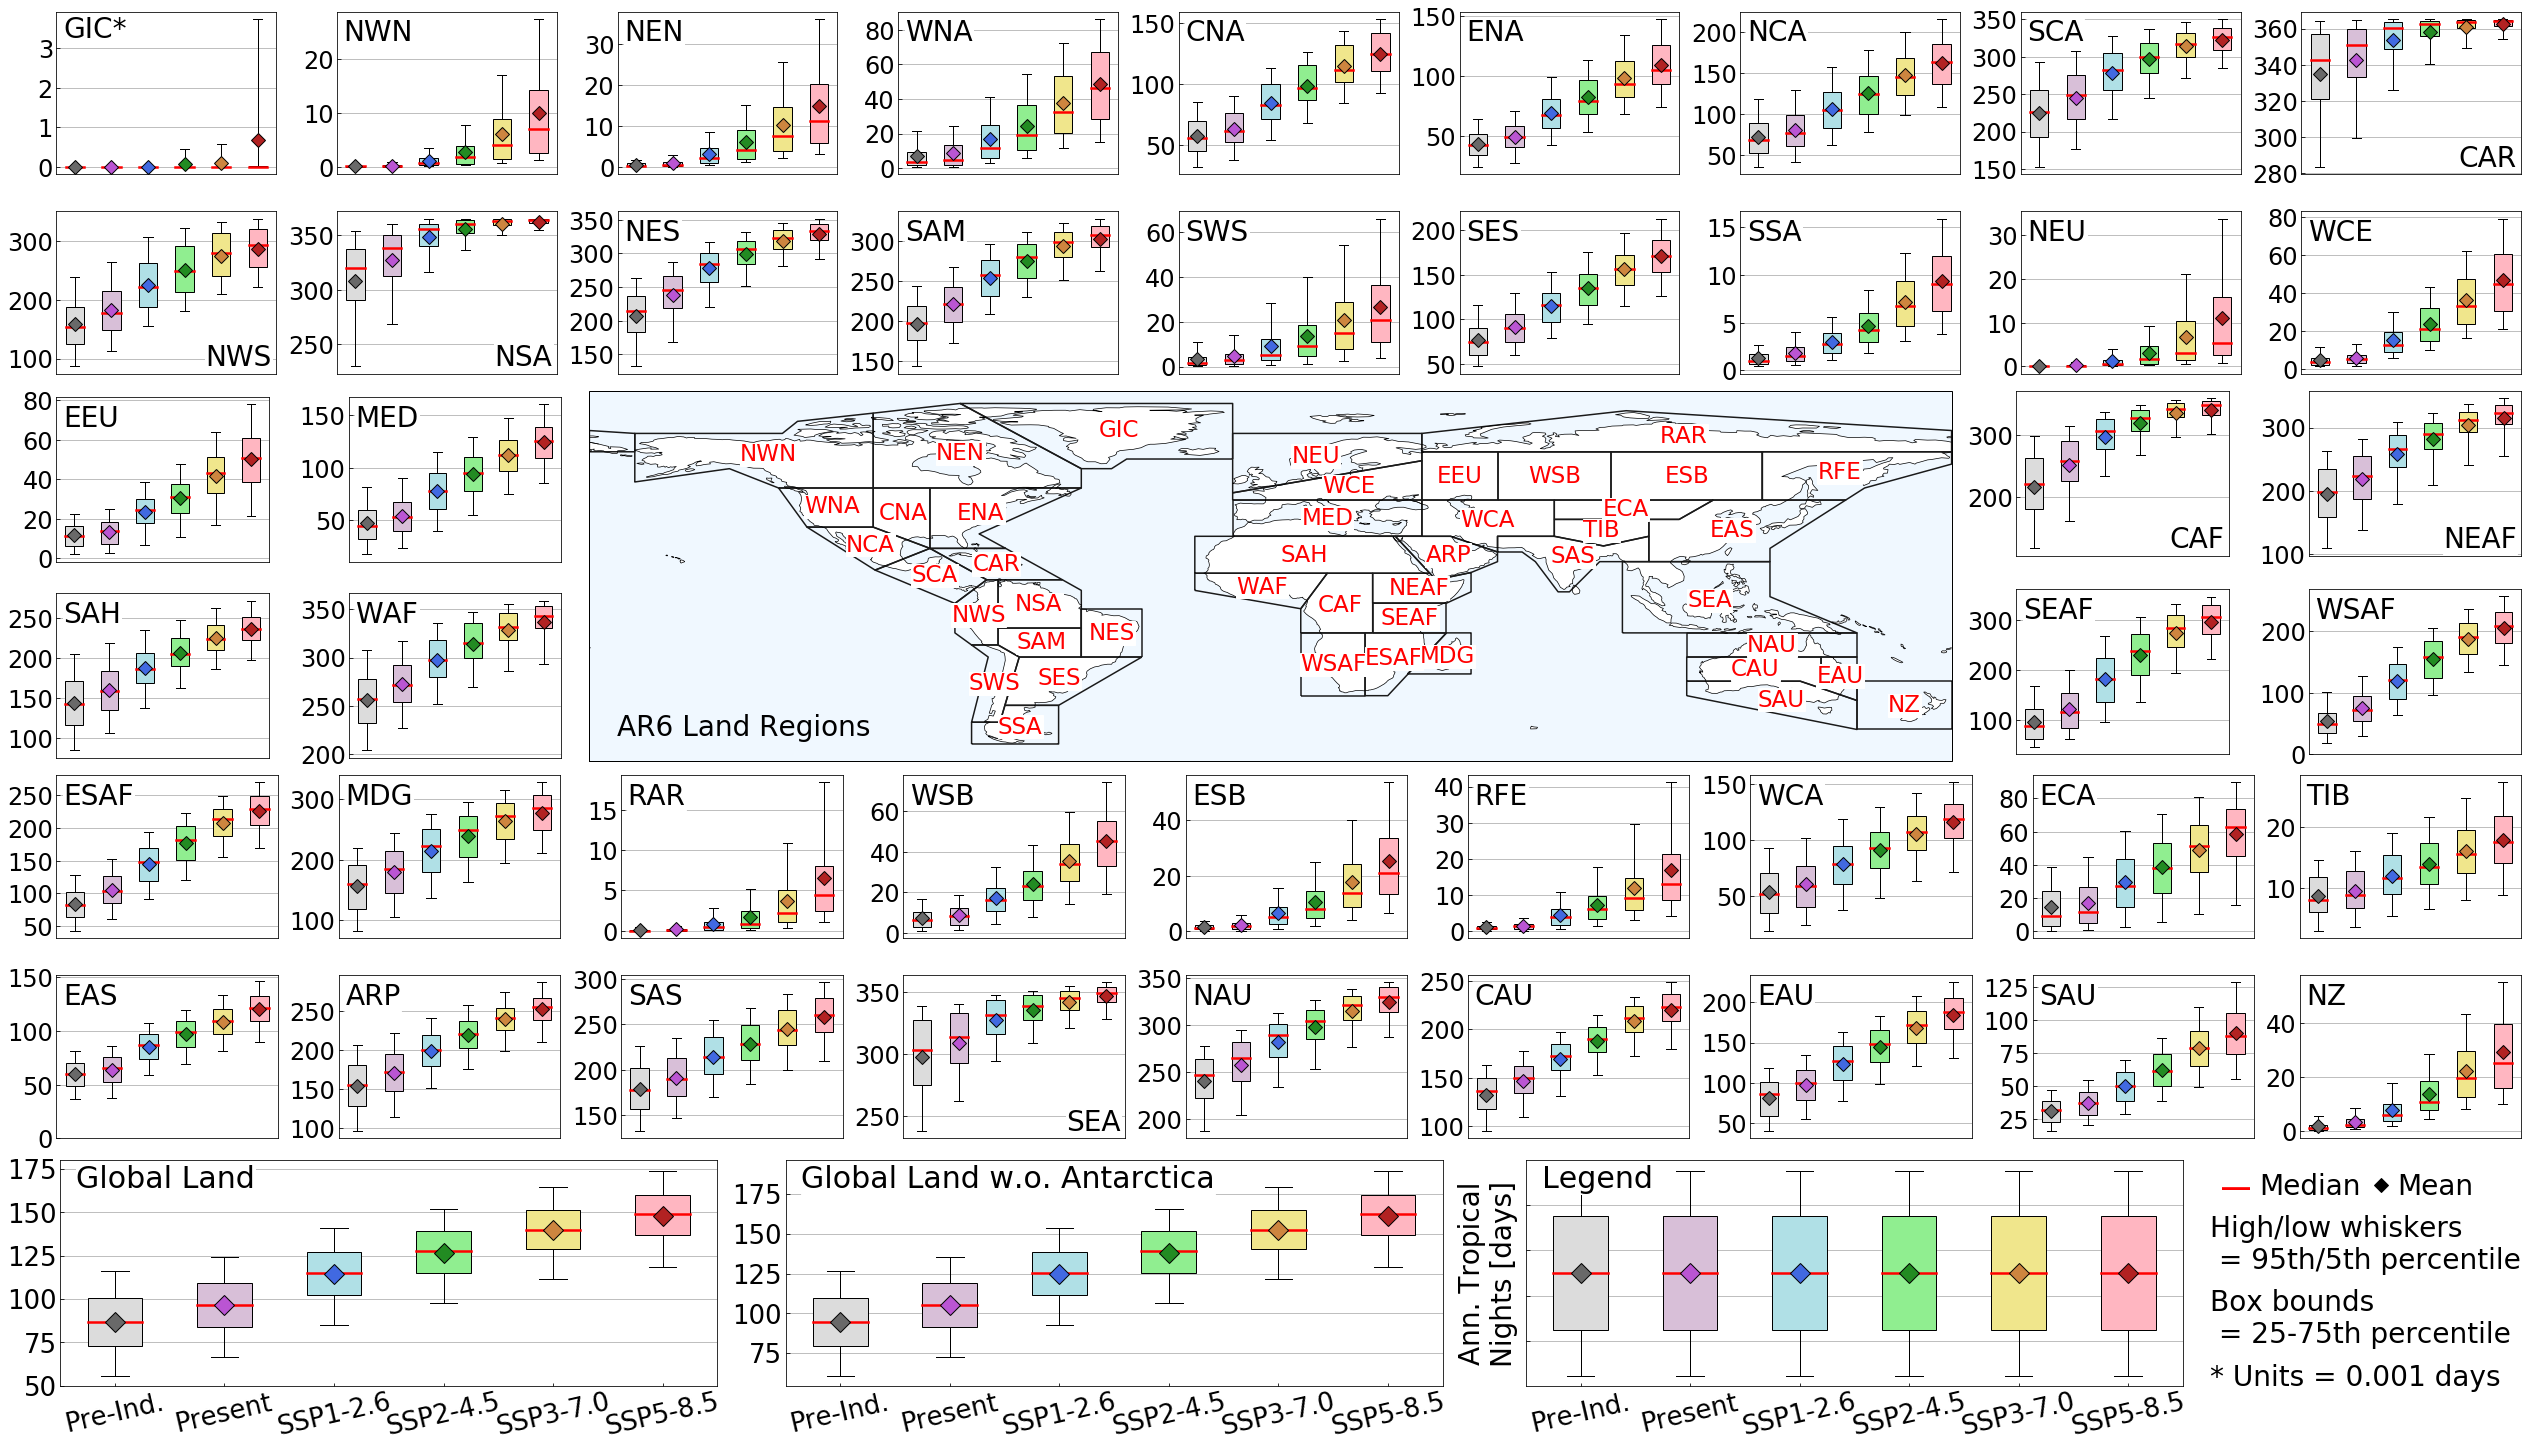

In [5]:
# define high-level figure properties
region_label_fs = 28
tick_label_fs = 24
medianprops = dict(linestyle = '-', linewidth = 2.5, color = 'red')
meanprops = dict(marker = 'D', markersize = 10, markeredgecolor = 'black')
boxprops = dict(linestyle = '-', linewidth = 1)
marker_colours = ['dimgrey', 'mediumorchid', 'royalblue', 'forestgreen', 'peru', 'firebrick']
boxfill_colours = ['gainsboro', 'thistle', 'powderblue', 'lightgreen', 'khaki', 'lightpink']


########## figure plot base ##########


# create overall figure and base subplots
fig = plt.figure(figsize = (35, 20), constrained_layout = True)
widths, heights = [2, 5, 2], [2, 2, 2, 1.5] 
gs = fig.add_gridspec(nrows = 4, ncols = 3, width_ratios = widths, height_ratios = heights)

# create a 2x9 grid in the entire first row of the main base grid
gs_a = gs[0: 1, 0: 3].subgridspec(nrows = 2, ncols = 9)
axs1, axs2, axs3 = fig.add_subplot(gs_a[0, 0]), fig.add_subplot(gs_a[0, 1]), fig.add_subplot(gs_a[0, 2])
axs4, axs5, axs6 = fig.add_subplot(gs_a[0, 3]), fig.add_subplot(gs_a[0, 4]), fig.add_subplot(gs_a[0, 5])
axs7, axs8, axs9 = fig.add_subplot(gs_a[0, 6]), fig.add_subplot(gs_a[0, 7]), fig.add_subplot(gs_a[0, 8])
axs10, axs11, axs12 = fig.add_subplot(gs_a[1, 0]), fig.add_subplot(gs_a[1, 1]), fig.add_subplot(gs_a[1, 2])
axs13, axs14, axs15 = fig.add_subplot(gs_a[1, 3]), fig.add_subplot(gs_a[1, 4]), fig.add_subplot(gs_a[1, 5])
axs16, axs17, axs18 = fig.add_subplot(gs_a[1, 6]), fig.add_subplot(gs_a[1, 7]), fig.add_subplot(gs_a[1, 8])

# create a 2x2 grid in the second row and first column of the main base grid
gs_b = gs[1: 2, 0: 1].subgridspec(nrows = 2, ncols = 2)
axs19, axs20 = fig.add_subplot(gs_b[0, 0]), fig.add_subplot(gs_b[0, 1])
axs21, axs22 = fig.add_subplot(gs_b[1, 0]), fig.add_subplot(gs_b[1, 1])

# create a 1x1 grid in the second row and second column of the main base grid
gs_c = gs[1: 2, 1: 2].subgridspec(nrows = 1, ncols = 1)
axs23 = fig.add_subplot(gs_c[0, 0], projection = ccrs.PlateCarree()) # create as a GeoAxes for map plot

# create a 2x2 grid in the second row and third column of the main base grid
gs_d = gs[1: 2, 2: 3].subgridspec(nrows = 2, ncols = 2)
axs24, axs25 = fig.add_subplot(gs_d[0, 0]), fig.add_subplot(gs_d[0, 1])
axs26, axs27 = fig.add_subplot(gs_d[1, 0]), fig.add_subplot(gs_d[1, 1])

# create a 2x9 grid in the entire thrid row of the main base grid
gs_e = gs[2: 3, 0: 3].subgridspec(nrows = 2, ncols = 9)
axs28, axs29, axs30 = fig.add_subplot(gs_e[0, 0]), fig.add_subplot(gs_e[0, 1]), fig.add_subplot(gs_e[0, 2])
axs31, axs32, axs33 = fig.add_subplot(gs_e[0, 3]), fig.add_subplot(gs_e[0, 4]), fig.add_subplot(gs_e[0, 5])
axs34, axs35, axs36 = fig.add_subplot(gs_e[0, 6]), fig.add_subplot(gs_e[0, 7]), fig.add_subplot(gs_e[0, 8])
axs37, axs38, axs39 = fig.add_subplot(gs_e[1, 0]), fig.add_subplot(gs_e[1, 1]), fig.add_subplot(gs_e[1, 2])
axs40, axs41, axs42 = fig.add_subplot(gs_e[1, 3]), fig.add_subplot(gs_e[1, 4]), fig.add_subplot(gs_e[1, 5])
axs43, axs44, axs45 = fig.add_subplot(gs_e[1, 6]), fig.add_subplot(gs_e[1, 7]), fig.add_subplot(gs_e[1, 8])

# create a 1x3 grid in the entire fourth row of the main base grid
gs_f = gs[3: 4, 0: 3].subgridspec(nrows = 1, ncols = 11)
axs46, axs47, axs48 = fig.add_subplot(gs_f[0, 0: 3]), fig.add_subplot(gs_f[0, 3: 6]), fig.add_subplot(gs_f[0, 6: 9])
axs49 = fig.add_subplot(gs_f[0, 9: 11])

# define axis lists for different parts of figure
region_axes = [axs1, axs2, axs3, axs4, axs5, axs6, axs7, axs8, axs9, axs10, axs11, axs12, axs13, axs14,
               axs15, axs16, axs17, axs18, axs19, axs20, axs21, axs22, axs24, axs25, axs26, axs27,
               axs28, axs29, axs30, axs31, axs32, axs33, axs34, axs35, axs36, axs37, axs38, axs39,
               axs40, axs41, axs42, axs43, axs44, axs45]
map_axes = axs23
global_and_key_axes = [axs46, axs47, axs48]


########## global map showing land AR6 regions ##########


# omitting Antartica regions; define the land regions excluding Antartica
land_regions = regionmask.defined_regions.ar6.land
regions_wo_antartica = land_regions.abbrevs[0: -2] # Anatartica regions at the end

# define the properties to pass to RegionMask plotting function
text_kws = dict(color = 'r', fontsize = tick_label_fs - 1, bbox = dict(pad = 0.2, color = "w"))
ocean_kws = dict(facecolor = 'aliceblue', zorder = 1)
coastline_kws = dict(color = 'black', lw = 0.7, zorder = 2)

# plot global map of the land AR6 regions
land_regions.plot(ax = map_axes, add_ocean = True, regions = regions_wo_antartica, # omit Antartica regions
                  ocean_kws = ocean_kws, text_kws = text_kws, coastline_kws = coastline_kws, resolution = '110m',
                  label = 'abbrev')

# reposition the axis and rescale to fill full space between box plots
map_axes.set_position([(2 / 9) + 0.01, (7 / 15) + 0.0075, 
                       (5 / 9) - 0.015, (4 / 15) - 0.01]) # [left, bottom, width, height]
map_axes.set_aspect('auto')

# add title to map
map_axes.text(x = 0.02, y = 0.07, s = 'AR6 Land Regions', fontsize = region_label_fs,
              transform = map_axes.transAxes)


########## annual tropical night box plots for the land AR6 regions ##########


# plot each box plot a region at a time        
for i, axs in enumerate(region_axes):
    
    # edit axes for each plot
    axs.yaxis.grid(True) # add horizontal gridlines
    axs.xaxis.set_visible(False) # hide x-axis
    axs.tick_params(axis = 'both', labelsize = tick_label_fs, direction = 'in')
    axs.locator_params(axis = 'y', nbins = 5) # restrict y-axis to a maxium of 5 intervals
    
    # define the abbreviation for the region being plotted
    region_abbrev = regions_wo_antartica[i]
    
    # add abbreviation to plot; some regions need a bottom left placement to avoid overlapping data
    if region_abbrev in ['CAR', 'NWS', 'NSA', 'NEAF', 'CAF', 'SEA']:
        axs.text(x = 0.98, y = 0.05, s = region_abbrev, fontsize = region_label_fs,
                 transform = axs.transAxes, bbox = dict(pad = 0.2, color = 'w'),
                 horizontalalignment = 'right')
    else:
        axs.text(x = 0.03, y = 0.82, s = region_abbrev, fontsize = region_label_fs,
                 transform = axs.transAxes, bbox = dict(pad = 0.2, color = "w"))
    
    # extract the data for this region only
    reg_df = ar6_df[f'{region_abbrev}']
    
    # create an empty list to populate with each scenario's box plot data for a given region
    reg_bp_data = []
    
    # extract the box plot data for each scenario
    for scenario in ['pre_ind', 'current', 'ssp126', 'ssp245', 'ssp370', 'ssp585']:
        label = scenario
        mean = reg_df[f'{scenario}_mean_ann_tn_abso']
        median = reg_df[f'{scenario}_medi_ann_tn_abso']
        q1 = reg_df[f'{scenario}_quantiles_ann_tn_abso_pct_25']
        q3 = reg_df[f'{scenario}_quantiles_ann_tn_abso_pct_75']
        whislo = reg_df[f'{scenario}_quantiles_ann_tn_abso_pct_05']
        whishi = reg_df[f'{scenario}_quantiles_ann_tn_abso_pct_95']
        
        # add the box plot data to the regional list for given scenario
        scenario_dict = {'label': label, 'med': median, 'mean': mean, 'q1': q1, 'q3': q3,
                         'whislo': whislo, 'whishi': whishi}
        reg_bp_data.append(scenario_dict)
        
    # plot box plot for given region
    box_plot = axs.bxp(reg_bp_data, showmeans = True, showfliers = False, 
                       patch_artist = True, # fill each box with colour
                       medianprops = medianprops, meanprops = meanprops, boxprops = boxprops) 
    
    # customise the colour fill for each box
    for patch, colour in zip(box_plot['boxes'], boxfill_colours):
        patch.set_facecolor(colour)
    
    # customise the colour fill for each mean marker
    for marker, colour in zip(box_plot['means'], marker_colours):
        marker.set_markerfacecolor(colour)
        
# modify Greenland and Iceland (GIC) region; remove decimal places from tick label
mod_ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x * 1000))
axs1.yaxis.set_major_formatter(mod_ticks) # units now 'micro/0.001 Days'
axs1.text(x = 0.03, y = 0.84, s = 'GIC*', fontsize = region_label_fs,
          transform = axs1.transAxes, bbox = dict(pad = 0.2, color = "w"))


########## global box plots and key ##########


# define DataFrame variables and labels
df_var = ['land', 'land_wo_antarctica']
plot_labels = ['Global Land', 'Global Land w.o. Antarctica', 'Legend']
scenario_labels = ['Pre-Ind.', 'Present', 'SSP1-2.6', 'SSP2-4.5', 'SSP3-7.0', 'SSP5-8.5']

# plot base of each box plot      
for i, axs in enumerate(global_and_key_axes):
    
    # edit axes for each plot
    axs.yaxis.grid(True) # add horizontal gridlines
    axs.tick_params(axis = 'both', labelsize = tick_label_fs + 2, direction = 'in')
    axs.tick_params(axis = 'x', labelrotation = 13)
    axs.locator_params(axis = 'y', nbins = 6)  # restrict y-axis to a maxium of 6 intervals
    
    # add abbreviation to plot
    axs.text(x = 0.024, y = 0.88, s = plot_labels[i], fontsize = region_label_fs + 2,
             transform = axs.transAxes, bbox = dict(pad = 0.3, color = "w"))
    
# plot both global land data
for i, axs in enumerate(global_and_key_axes[0: -1]): # key last axis in the list
    
    # extract the data for this region only
    reg_df = ar6_df[f'{df_var[i]}']
    
    # create an empty list to populate with each scenario's box plot data for a given region
    reg_bp_data = []
    
    # extract the box plot data for each scenario
    for i, scenario in enumerate(['pre_ind', 'current', 'ssp126', 'ssp245', 'ssp370', 'ssp585']):
        label = scenario_labels[i]
        mean = reg_df[f'{scenario}_mean_ann_tn_abso']
        median = reg_df[f'{scenario}_medi_ann_tn_abso']
        q1 = reg_df[f'{scenario}_quantiles_ann_tn_abso_pct_25']
        q3 = reg_df[f'{scenario}_quantiles_ann_tn_abso_pct_75']
        whislo = reg_df[f'{scenario}_quantiles_ann_tn_abso_pct_05']
        whishi = reg_df[f'{scenario}_quantiles_ann_tn_abso_pct_95']
        
        # add the box plot data to the regional list for given scenario
        scenario_dict = {'label': label, 'med': median, 'mean': mean, 'q1': q1, 'q3': q3,
                         'whislo': whislo, 'whishi': whishi}
        reg_bp_data.append(scenario_dict)
        
    # plot box plot for given region
    box_plot = axs.bxp(reg_bp_data, showmeans = True, showfliers = False, 
                       patch_artist = True, # fill each box with colour
                       meanprops = dict(marker = 'D', markeredgecolor = 'black', markersize = 14),
                       boxprops = boxprops, medianprops = medianprops) 
    
    # customise the colour fill for each box
    for patch, colour in zip(box_plot['boxes'], boxfill_colours):
        patch.set_facecolor(colour)
    
    # customise the colour fill for each mean marker
    for marker, colour in zip(box_plot['means'], marker_colours):
        marker.set_markerfacecolor(colour)
        
# define dummy data for legend
dum_mean, dum_median, dum_q1, dum_q3, dum_lo, dum_hi = 50, 50, 25, 75, 5, 95

# plot dummy data to form legend
dum_bp_data = []
for scenario in ['Pre-Ind.', 'Present', 'SSP1-2.6', 'SSP2-4.5', 'SSP3-7.0', 'SSP5-8.5']:
    
    # add the box plot data to the dummy data list for given scenario
    scenario_dict = {'label': scenario, 'med': dum_mean, 'mean': dum_mean, 'q1': dum_q1, 'q3': dum_q3,
                     'whislo': dum_lo, 'whishi': dum_hi}
    dum_bp_data.append(scenario_dict)
        
# plot box plot for dummy data
box_plot = axs48.bxp(dum_bp_data, showmeans = True, showfliers = False, 
                     patch_artist = True, # fill each box with colour
                     meanprops = dict(marker = 'D', markeredgecolor = 'black', markersize = 14),
                     boxprops = boxprops, medianprops = medianprops) 
    
# customise the colour fill for each box
for patch, colour in zip(box_plot['boxes'], boxfill_colours):
    patch.set_facecolor(colour)
    
# customise the colour fill for each mean marker
for marker, colour in zip(box_plot['means'], marker_colours):
    marker.set_markerfacecolor(colour)    
    
# add y-axis title to legend; remove tick labels    
axs48.set_ylabel('Ann. Tropical\nNights [days]', fontsize = region_label_fs)
axs48.yaxis.set_ticklabels([])

# add legend labels to side of the legend
axs49.axis('off')
axs49.set_xlim(left = 0, right = 1) # restrict axis so can add marker using plot function
axs49.set_ylim(bottom = 0, top = 1)

# add median legend entry
axs49.text(x = 0.1, y = 0.9, s = '__', fontsize = region_label_fs,  weight = 'semibold',
           color = 'red', transform = axs49.transAxes)
axs49.text(x = 0.25, y = 0.85, s = 'Median', fontsize = region_label_fs,
           transform = axs49.transAxes)

# add mean legend entry
axs49.plot(0.75, 0.89, marker = 'D', markersize = 10, color = 'black')
axs49.text(x = 0.82, y = 0.85, s = 'Mean', fontsize = region_label_fs,
           transform = axs49.transAxes)

# add whisker and box bounds legend entry
axs49.text(x = 0.05, y = 0.52, s = 'High/low whiskers\n = 95th/5th percentile', 
           fontsize = region_label_fs, transform = axs49.transAxes)
axs49.text(x = 0.05, y = 0.19, s = 'Box bounds\n = 25-75th percentile',
           fontsize = region_label_fs, transform = axs49.transAxes)

# add note on Greenland and Iceland data scaling
axs49.text(x = 0.05, y = 0.0, s = '* Units = 0.001 days',
           fontsize = region_label_fs, transform = axs49.transAxes)

# workaround to ensure figure has similar vertical spacing; set axis such that a y values is aligned with x axis
axs37.set_ylim(ymin = 0)
axs27.set_ylim(ymin = 0)


########## save figure ##########


# save figure
save_pw = '/home/ucfagtj/DATA/Dissertation/figures/trop_nights/' + \
          f'regional_absolute_ann_trop_nights.png'
print(f'Figure saved: {save_pw}')
fig.savefig(save_pw, bbox_inches = 'tight', pad_inches = 0.1)

### Mean Annual Number of Tropical Nights Anomaly (Pre-Ind): Regional Breakdown

In [5]:
# load data for figure
srex_pw = f'/home/ucfagtj/DATA/Dissertation/Data/trop_nights/processed/ensemble_trop_nights_variables_AR6.pickle'
unpickle = open(srex_pw, 'rb')
ar6_df = pickle.load(unpickle)

Figure saved: /home/ucfagtj/DATA/Dissertation/figures/trop_nights/regional_ann_trop_nights_relative_to_pre_ind.png


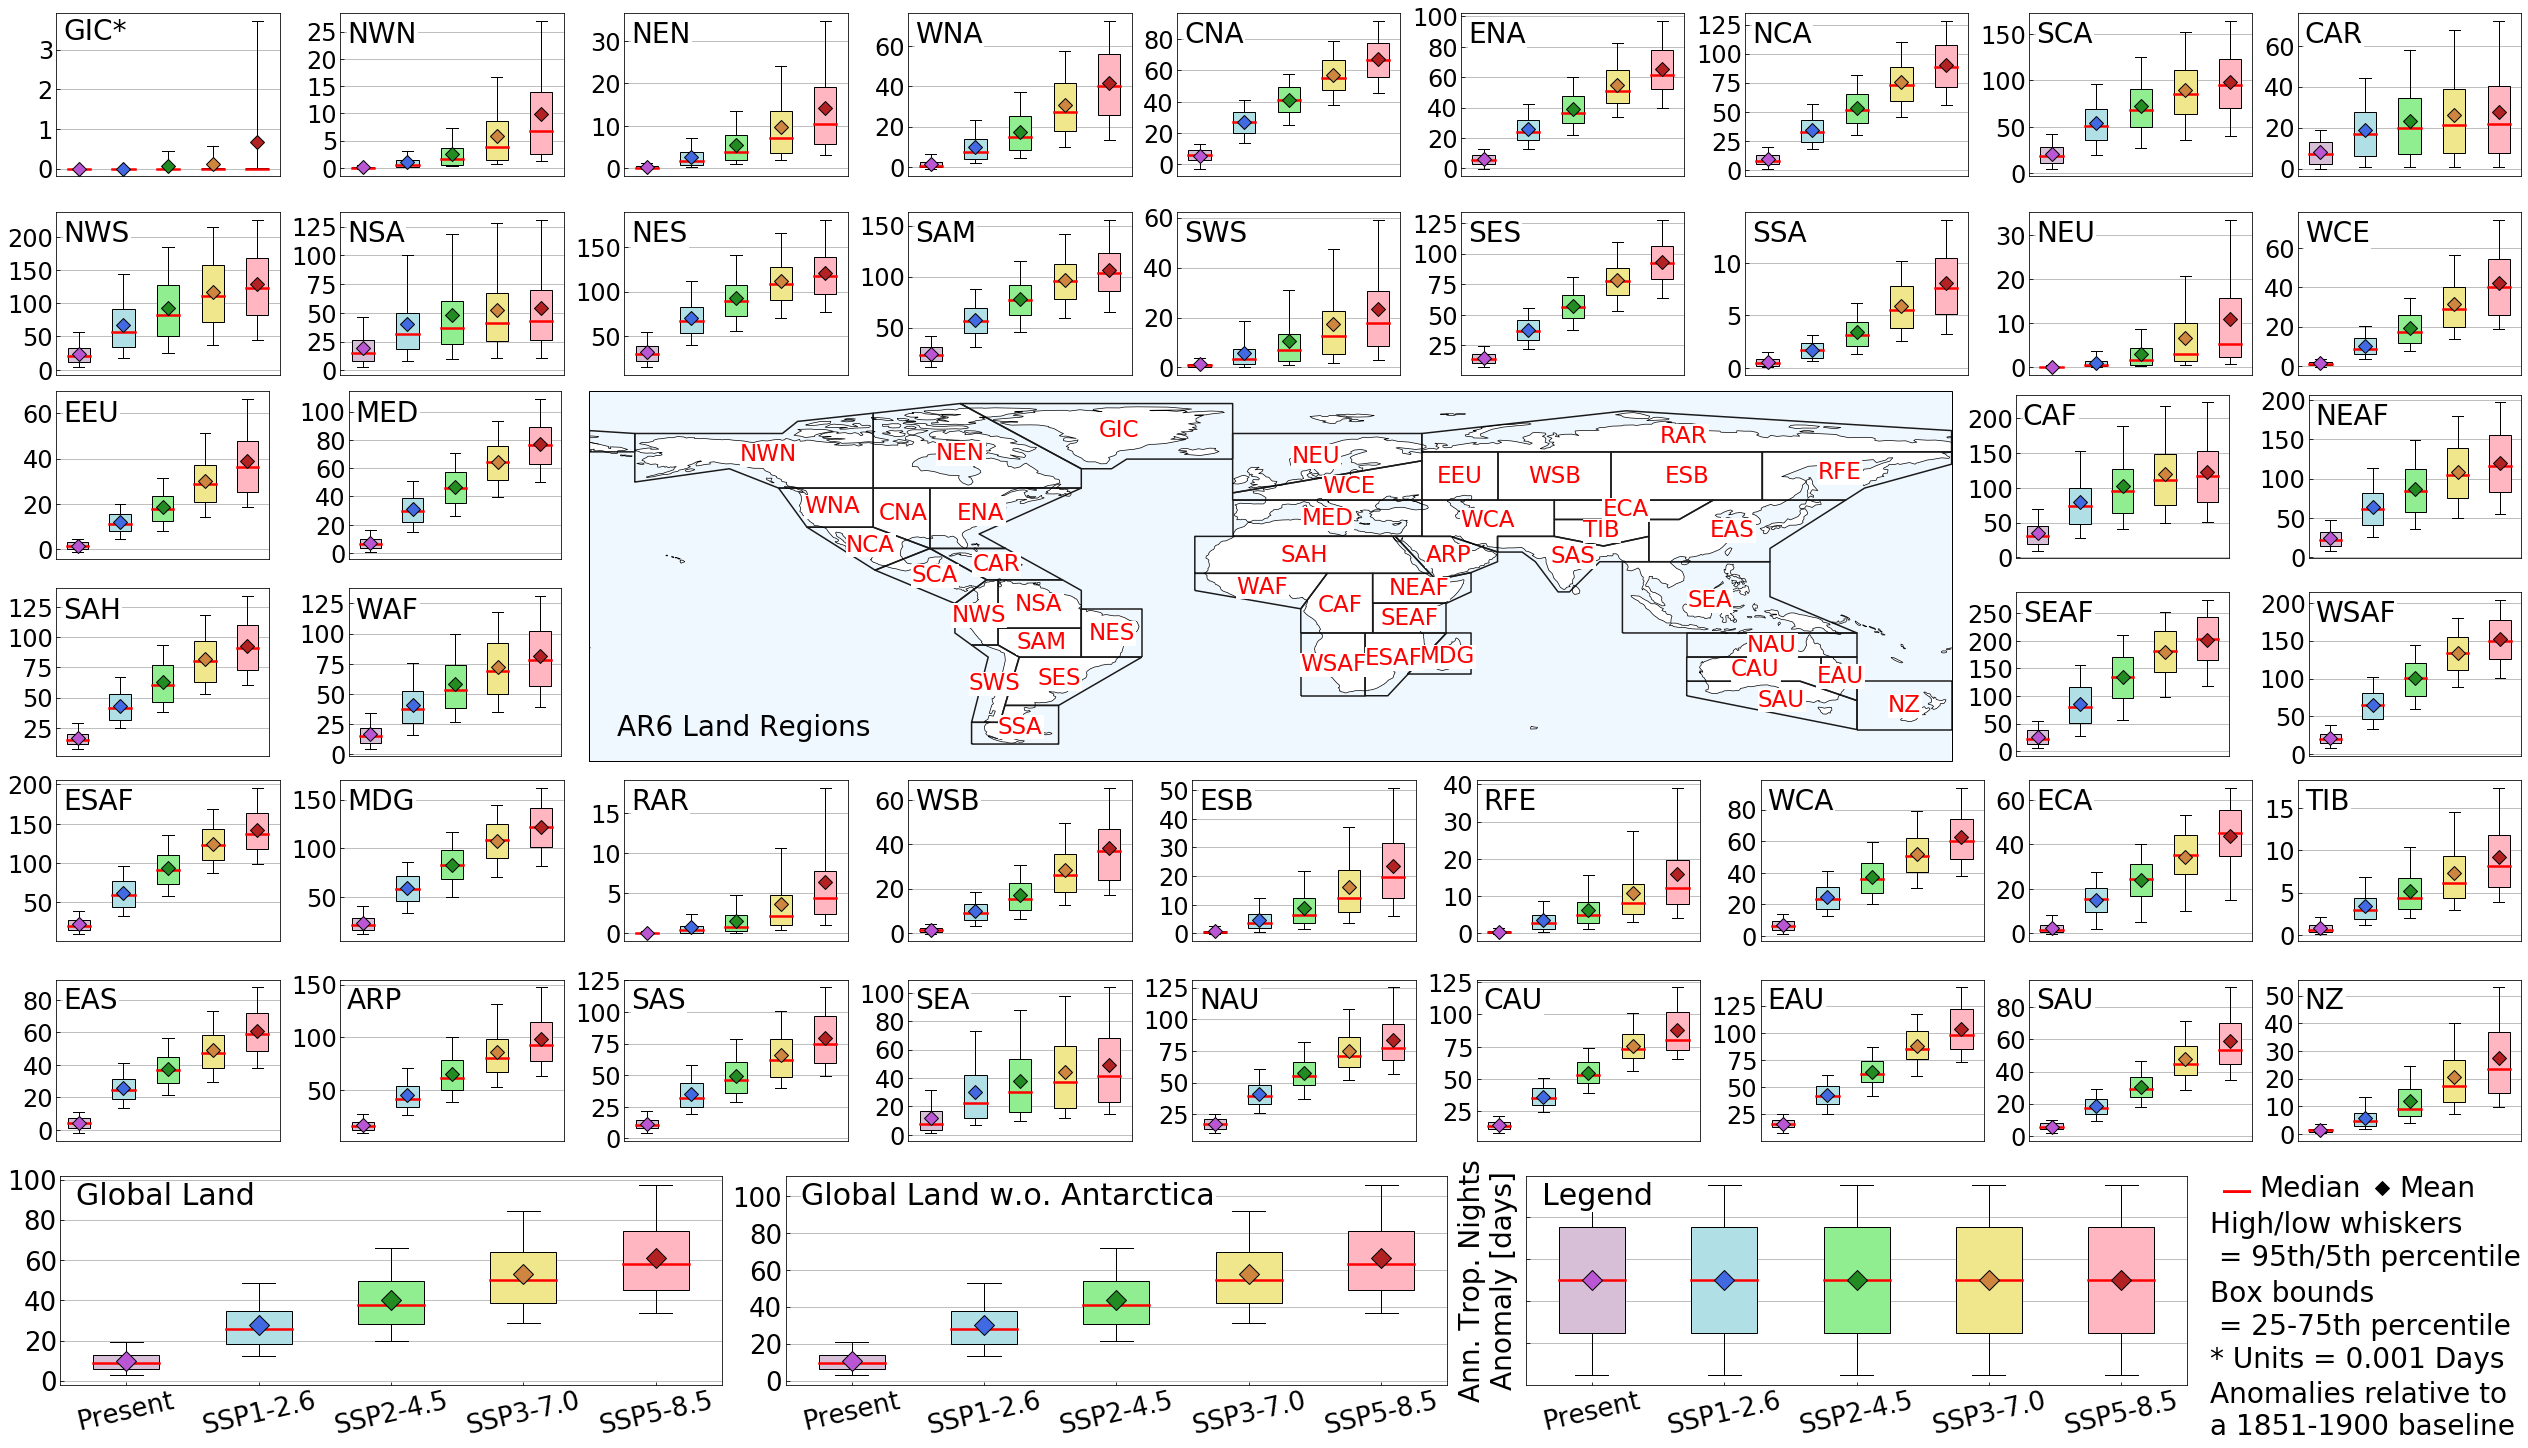

In [6]:
# define high-level figure properties
region_label_fs = 28
tick_label_fs = 24
medianprops = dict(linestyle = '-', linewidth = 2.5, color = 'red')
meanprops = dict(marker = 'D', markersize = 10, markeredgecolor = 'black')
boxprops = dict(linestyle = '-', linewidth = 1)
marker_colours = ['mediumorchid', 'royalblue', 'forestgreen', 'peru', 'firebrick']
boxfill_colours = ['thistle', 'powderblue', 'lightgreen', 'khaki', 'lightpink']


########## figure plot base ##########


# create overall figure and base subplots
fig = plt.figure(figsize = (35, 20), constrained_layout = True)
widths, heights = [2, 5, 2], [2, 2, 2, 1.5] 
gs = fig.add_gridspec(nrows = 4, ncols = 3, width_ratios = widths, height_ratios = heights)

# create a 2x9 grid in the entire first row of the main base grid
gs_a = gs[0: 1, 0: 3].subgridspec(nrows = 2, ncols = 9) 
axs1, axs2, axs3 = fig.add_subplot(gs_a[0, 0]), fig.add_subplot(gs_a[0, 1]), fig.add_subplot(gs_a[0, 2])
axs4, axs5, axs6 = fig.add_subplot(gs_a[0, 3]), fig.add_subplot(gs_a[0, 4]), fig.add_subplot(gs_a[0, 5])
axs7, axs8, axs9 = fig.add_subplot(gs_a[0, 6]), fig.add_subplot(gs_a[0, 7]), fig.add_subplot(gs_a[0, 8])
axs10, axs11, axs12 = fig.add_subplot(gs_a[1, 0]), fig.add_subplot(gs_a[1, 1]), fig.add_subplot(gs_a[1, 2])
axs13, axs14, axs15 = fig.add_subplot(gs_a[1, 3]), fig.add_subplot(gs_a[1, 4]), fig.add_subplot(gs_a[1, 5])
axs16, axs17, axs18 = fig.add_subplot(gs_a[1, 6]), fig.add_subplot(gs_a[1, 7]), fig.add_subplot(gs_a[1, 8])

# create a 2x2 grid in the second row and first column of the main base grid
gs_b = gs[1: 2, 0: 1].subgridspec(nrows = 2, ncols = 2)
axs19, axs20 = fig.add_subplot(gs_b[0, 0]), fig.add_subplot(gs_b[0, 1])
axs21, axs22 = fig.add_subplot(gs_b[1, 0]), fig.add_subplot(gs_b[1, 1])

# create a 1x1 grid in the second row and second column of the main base grid
gs_c = gs[1: 2, 1: 2].subgridspec(nrows = 1, ncols = 1)
axs23 = fig.add_subplot(gs_c[0, 0], projection = ccrs.PlateCarree()) # create as a GeoAxes for map plot

# create a 2x2 grid in the second row and third column of the main base grid
gs_d = gs[1: 2, 2: 3].subgridspec(nrows = 2, ncols = 2)
axs24, axs25 = fig.add_subplot(gs_d[0, 0]), fig.add_subplot(gs_d[0, 1])
axs26, axs27 = fig.add_subplot(gs_d[1, 0]), fig.add_subplot(gs_d[1, 1])

# create a 2x9 grid in the entire thrid row of the main base grid
gs_e = gs[2: 3, 0: 3].subgridspec(nrows = 2, ncols = 9) # create a 2x9 grid in the third row of the main 3x3 base grid
axs28, axs29, axs30 = fig.add_subplot(gs_e[0, 0]), fig.add_subplot(gs_e[0, 1]), fig.add_subplot(gs_e[0, 2])
axs31, axs32, axs33 = fig.add_subplot(gs_e[0, 3]), fig.add_subplot(gs_e[0, 4]), fig.add_subplot(gs_e[0, 5])
axs34, axs35, axs36 = fig.add_subplot(gs_e[0, 6]), fig.add_subplot(gs_e[0, 7]), fig.add_subplot(gs_e[0, 8])
axs37, axs38, axs39 = fig.add_subplot(gs_e[1, 0]), fig.add_subplot(gs_e[1, 1]), fig.add_subplot(gs_e[1, 2])
axs40, axs41, axs42 = fig.add_subplot(gs_e[1, 3]), fig.add_subplot(gs_e[1, 4]), fig.add_subplot(gs_e[1, 5])
axs43, axs44, axs45 = fig.add_subplot(gs_e[1, 6]), fig.add_subplot(gs_e[1, 7]), fig.add_subplot(gs_e[1, 8])

# create a 1x3 grid in the entire fourth row of the main base grid
gs_f = gs[3: 4, 0: 3].subgridspec(nrows = 1, ncols = 11)
axs46, axs47, axs48 = fig.add_subplot(gs_f[0, 0: 3]), fig.add_subplot(gs_f[0, 3: 6]), fig.add_subplot(gs_f[0, 6: 9])
axs49 = fig.add_subplot(gs_f[0, 9: 11])

# define axis lists for different parts of figure
region_axes = [axs1, axs2, axs3, axs4, axs5, axs6, axs7, axs8, axs9, axs10, axs11, axs12, axs13, axs14,
               axs15, axs16, axs17, axs18, axs19, axs20, axs21, axs22, axs24, axs25, axs26, axs27,
               axs28, axs29, axs30, axs31, axs32, axs33, axs34, axs35, axs36, axs37, axs38, axs39,
               axs40, axs41, axs42, axs43, axs44, axs45]
map_axes = axs23
global_and_key_axes = [axs46, axs47, axs48]


########## global map showing land AR6 regions ##########


# omitting Antartica regions; define the land regions excluding Antartica
land_regions = regionmask.defined_regions.ar6.land
regions_wo_antartica = land_regions.abbrevs[0: -2] # Anatartica regions at the end

# define the properties to pass to RegionMask plotting function
text_kws = dict(color = 'r', fontsize = tick_label_fs - 1, bbox = dict(pad = 0.2, color = "w"))
ocean_kws = dict(facecolor = 'aliceblue', zorder = 1)
coastline_kws = dict(color = 'black', lw = 0.7, zorder = 2)

# plot global map of the land AR6 regions
land_regions.plot(ax = map_axes, add_ocean = True, regions = regions_wo_antartica, # omit Antartica regions
                  ocean_kws = ocean_kws, text_kws = text_kws, coastline_kws = coastline_kws, resolution = '110m',
                  label = 'abbrev')

# reposition the axis and rescale to fill full space between box plots
map_axes.set_position([(2 / 9) + 0.01, (7 / 15) + 0.0075, 
                       (5 / 9) - 0.015, (4 / 15) - 0.01]) # [left, bottom, width, height]
map_axes.set_aspect('auto')

# add title to map
map_axes.text(x = 0.02, y = 0.07, s = 'AR6 Land Regions', fontsize = region_label_fs,
              transform = map_axes.transAxes)


########## annual tropical night anomaly box plots for the land AR6 regions ##########


# plot each box plot a region at a time        
for i, axs in enumerate(region_axes):
    
    # edit axes for each plot
    axs.yaxis.grid(True)
    axs.xaxis.set_visible(False)
    axs.tick_params(axis = 'both', labelsize = tick_label_fs, direction = 'in')
    axs.locator_params(axis = 'y', nbins = 6)  # restrict y-axis to a maxium of 5 intervals
    
    # define the abbreviation for the region being plotted
    region_abbrev = regions_wo_antartica[i]
    
    # add abbreviation to plot
    axs.text(x = 0.03, y = 0.82, s = region_abbrev, fontsize = region_label_fs,
             transform = axs.transAxes, bbox = dict(pad = 0.2, color = "w"))
    
    # extract the data for this region only
    reg_df = ar6_df[f'{region_abbrev}']
    
    # create an empty list to populate with each scenario's box plot data for a given region
    reg_bp_data = []
    
    # extract the box plot data for each scenario
    for scenario in ['current', 'ssp126', 'ssp245', 'ssp370', 'ssp585']:
        label = scenario
        mean = reg_df[f'{scenario}_mean_ann_tn_anom']
        median = reg_df[f'{scenario}_medi_ann_tn_anom']
        q1 = reg_df[f'{scenario}_quantiles_ann_tn_anom_pct_25']
        q3 = reg_df[f'{scenario}_quantiles_ann_tn_anom_pct_75']
        whislo = reg_df[f'{scenario}_quantiles_ann_tn_anom_pct_05']
        whishi = reg_df[f'{scenario}_quantiles_ann_tn_anom_pct_95']
        
        # add the box plot data to the regional list for given scenario
        scenario_dict = {'label': label, 'med': median, 'mean': mean, 'q1': q1, 'q3': q3,
                         'whislo': whislo, 'whishi': whishi}
        reg_bp_data.append(scenario_dict)
        
    # plot box plot for given region
    box_plot = axs.bxp(reg_bp_data, showmeans = True, showfliers = False, 
                       patch_artist = True, # fill each box with colour
                       medianprops = medianprops, meanprops = meanprops, boxprops = boxprops) 
    
    # customise the colour fill for each box
    for patch, colour in zip(box_plot['boxes'], boxfill_colours):
        patch.set_facecolor(colour)
    
    # customise the colour fill for each mean marker
    for marker, colour in zip(box_plot['means'], marker_colours):
        marker.set_markerfacecolor(colour)
        
# modify Greenland and Iceland (GIC) region; remove decimal places from tick label
mod_ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x * 1000))
axs1.yaxis.set_major_formatter(mod_ticks)
axs1.text(x = 0.03, y = 0.84, s = 'GIC*', fontsize = region_label_fs,
          transform = axs1.transAxes, bbox = dict(pad = 0.2, color = "w"))


########## global box plots and key ##########

# define DataFrame variables and labels
df_var = ['land', 'land_wo_antarctica']
plot_labels = ['Global Land', 'Global Land w.o. Antarctica', 'Legend']
scenario_labels = ['Present', 'SSP1-2.6', 'SSP2-4.5', 'SSP3-7.0', 'SSP5-8.5']

# plot base of each box plot      
for i, axs in enumerate(global_and_key_axes):
    
    # edit axes for each plot
    axs.yaxis.grid(True)
    axs.tick_params(axis = 'both', labelsize = tick_label_fs + 2, direction = 'in')
    axs.tick_params(axis = 'x', labelrotation = 13)
    axs.locator_params(axis = 'y', nbins = 6)  # restrict y-axis to a maxium of 6 intervals
    
    # add abbreviation to plot
    axs.text(x = 0.024, y = 0.86, s = plot_labels[i], fontsize = region_label_fs + 2,
             transform = axs.transAxes, bbox = dict(pad = 0.3, color = "w"))
    
# plot both global land data
for i, axs in enumerate(global_and_key_axes[0: -1]): # key last axis in the list
    
    # extract the data for this region only
    reg_df = ar6_df[f'{df_var[i]}']
    
    # create an empty list to populate with each scenario's box plot data for a given region
    reg_bp_data = []
    
    # extract the box plot data for each scenario
    for i, scenario in enumerate(['current', 'ssp126', 'ssp245', 'ssp370', 'ssp585']):
        label = scenario_labels[i]
        mean = reg_df[f'{scenario}_mean_ann_tn_anom']
        median = reg_df[f'{scenario}_medi_ann_tn_anom']
        q1 = reg_df[f'{scenario}_quantiles_ann_tn_anom_pct_25']
        q3 = reg_df[f'{scenario}_quantiles_ann_tn_anom_pct_75']
        whislo = reg_df[f'{scenario}_quantiles_ann_tn_anom_pct_05']
        whishi = reg_df[f'{scenario}_quantiles_ann_tn_anom_pct_95']
        
        # add the box plot data to the regional list for given scenario
        scenario_dict = {'label': label, 'med': median, 'mean': mean, 'q1': q1, 'q3': q3,
                         'whislo': whislo, 'whishi': whishi}
        reg_bp_data.append(scenario_dict)
        
    # plot box plot for given region
    box_plot = axs.bxp(reg_bp_data, showmeans = True, showfliers = False, 
                       patch_artist = True, # fill each box with colour
                       meanprops = dict(marker = 'D', markeredgecolor = 'black', markersize = 14),
                       boxprops = boxprops, medianprops = medianprops) 
    
    # customise the colour fill for each box
    for patch, colour in zip(box_plot['boxes'], boxfill_colours):
        patch.set_facecolor(colour)
    
    # customise the colour fill for each mean marker
    for marker, colour in zip(box_plot['means'], marker_colours):
        marker.set_markerfacecolor(colour)
        
# define dummy data for legend
dum_mean, dum_median, dum_q1, dum_q3, dum_lo, dum_hi = 50, 50, 25, 75, 5, 95

# plot dummy data to form legend
dum_bp_data = []
for scenario in scenario_labels:
    
    # add the box plot data to the dummy data list for given scenario
    scenario_dict = {'label': scenario, 'med': dum_mean, 'mean': dum_mean, 'q1': dum_q1, 'q3': dum_q3,
                     'whislo': dum_lo, 'whishi': dum_hi}
    dum_bp_data.append(scenario_dict)
        
# plot box plot for dummy data
box_plot = axs48.bxp(dum_bp_data, showmeans = True, showfliers = False, 
                     patch_artist = True, # fill each box with colour
                     meanprops = dict(marker = 'D', markeredgecolor = 'black', markersize = 14),
                     boxprops = boxprops, medianprops = medianprops) 
    
# customise the colour fill for each box
for patch, colour in zip(box_plot['boxes'], boxfill_colours):
    patch.set_facecolor(colour)
    
# customise the colour fill for each mean marker
for marker, colour in zip(box_plot['means'], marker_colours):
    marker.set_markerfacecolor(colour)    
    
# add y-axis title to legend; remove tick labels    
axs48.set_ylabel('Ann. Trop. Nights\nAnomaly [days]', fontsize = region_label_fs)
axs48.yaxis.set_ticklabels([])

# add legend labels to side of the legend
axs49.axis('off')
axs49.set_xlim(left = 0, right = 1) # restrict axis so can add marker using plot function
axs49.set_ylim(bottom = 0, top = 1)

# add median legend entry
axs49.text(x = 0.1, y = 0.95, s = '__', fontsize = region_label_fs,  weight = 'semibold',
           color = 'red', transform = axs49.transAxes)
axs49.text(x = 0.25, y = 0.9, s = 'Median', fontsize = region_label_fs,
           transform = axs49.transAxes)

# add mean legend entry
axs49.plot(0.75, 0.94, marker = 'D', markersize = 10, color = 'black')
axs49.text(x = 0.82, y = 0.9, s = 'Mean', fontsize = region_label_fs,
           transform = axs49.transAxes)

# add whisker and box bounds legend entry
axs49.text(x = 0.05, y = 0.57, s = 'High/low whiskers\n = 95th/5th percentile', 
           fontsize = region_label_fs, transform = axs49.transAxes)
axs49.text(x = 0.05, y = 0.24, s = 'Box bounds\n = 25-75th percentile',
           fontsize = region_label_fs, transform = axs49.transAxes)

# add note on Greenland and Iceland data scaling
axs49.text(x = 0.05, y = 0.08, s = '* Units = 0.001 Days',
           fontsize = region_label_fs, transform = axs49.transAxes)

# add baseline
axs49.text(x = 0.05, y = -0.24, s = 'Anomalies relative to\na 1851-1900 baseline', 
           fontsize = region_label_fs, transform = axs49.transAxes)


########## save figure ##########


# save figure
save_pw = '/home/ucfagtj/DATA/Dissertation/figures/trop_nights/regional_ann_trop_nights_relative_to_pre_ind.png'
print(f'Figure saved: {save_pw}')
fig.savefig(save_pw, bbox_inches = 'tight', pad_inches = 0.1)

### Model Evaluation: Multi-Model Ensemble Anomaly and Model RMSEs

In [7]:
# load gridded data for figure
obs_pw = '/home/ucfagtj/DATA/Dissertation/Data/observations/' + \
         'AverageMap_HADEX2_TR_1981-2010_ANN_from-90to90_from-180to180.nc'
ens_pw = '/home/ucfagtj/DATA/Dissertation/Data/trop_nights/processed/ensemble_trop_nights_2_5x3_75_res.nc'
obs_anom_pw = '/home/ucfagtj/DATA/Dissertation/Data/observations/ensemble_trop_nights_observation_anomaly.nc'
obs_ds = xr.open_dataset(obs_pw, decode_times = False).index_avg
ens_ds = xr.open_dataset(ens_pw).current_mean_ann_tn_abso # only comparing to current period
obs_anom_ds = xr.open_dataset(obs_anom_pw).ens_HadEX2_anom

obs_ds.close(), ens_ds.close(), obs_anom_ds.close()

# load RMSE data for figure
rmse_pw = '/home/ucfagtj/DATA/Dissertation/Data/observations/rmse_tn_dictionary.pkl'
with open(rmse_pw, 'rb') as f:
    rmse_dict = pickle.load(f)
rel_rmse_pw = '/home/ucfagtj/DATA/Dissertation/Data/observations/rel_rmse_tn_dictionary.pkl'
with open(rel_rmse_pw, 'rb') as f:
    rel_rmse_dict = pickle.load(f)
    
# remove median entry from RMSE dictionary as do not require it
del(rmse_dict['median'])

# captilise ensemble spelling
rmse_dict['Ensemble'] = rmse_dict['ensemble']
rel_rmse_dict['Ensemble'] = rel_rmse_dict['ensemble']
del(rmse_dict['ensemble'], rel_rmse_dict['ensemble'])

print(rel_rmse_dict, rmse_dict, obs_anom_ds)

{'BCC-CSM2-MR': 0.0, 'CanESM5': 0.06661707281243702, 'CNRM-CM6-1': -0.0424566825490645, 'ACCESS-ESM1-5': 0.15566089012766696, 'ACCESS-CM2': -0.04680513189541843, 'INM-CM4-8': -0.09893831324373104, 'INM-CM5-0': -0.10694051336083812, 'IPSL-CM6A-LR': -0.007271554401256519, 'MIROC6': 0.3490770350565267, 'UKESM1-0-LL': -0.026154808403902937, 'MRI-ESM2-0': 0.1219143175216715, 'NorESM2-MM': 0.1390109735891479, 'AWI-CM-1-1-MR': 0.2536825954121755, 'GFDL-ESM4': -0.04958918952473409, 'MPI-ESM1-2-HR': 0.23368221913335838, 'Ensemble': -0.08022885057541983} {'BCC-CSM2-MR': 41.836331514213406, 'CanESM5': 44.62334545690101, 'CNRM-CM6-1': 40.060099668097024, 'ACCESS-ESM1-5': 48.34861211739203, 'ACCESS-CM2': 39.8781764996702, 'INM-CM4-8': 37.69711544189158, 'INM-CM5-0': 37.362332744949214, 'IPSL-CM6A-LR': 41.5321163536588, 'MIROC6': 56.44043407683695, 'UKESM1-0-LL': 40.74211027913699, 'MRI-ESM2-0': 46.93677931837913, 'NorESM2-MM': 47.65204068940256, 'AWI-CM-1-1-MR': 52.44948067526325, 'GFDL-ESM4': 39.7

Figure saved: /home/ucfagtj/DATA/Dissertation/figures/trop_nights/ensemble_vs_obs_and_model_rmses.png


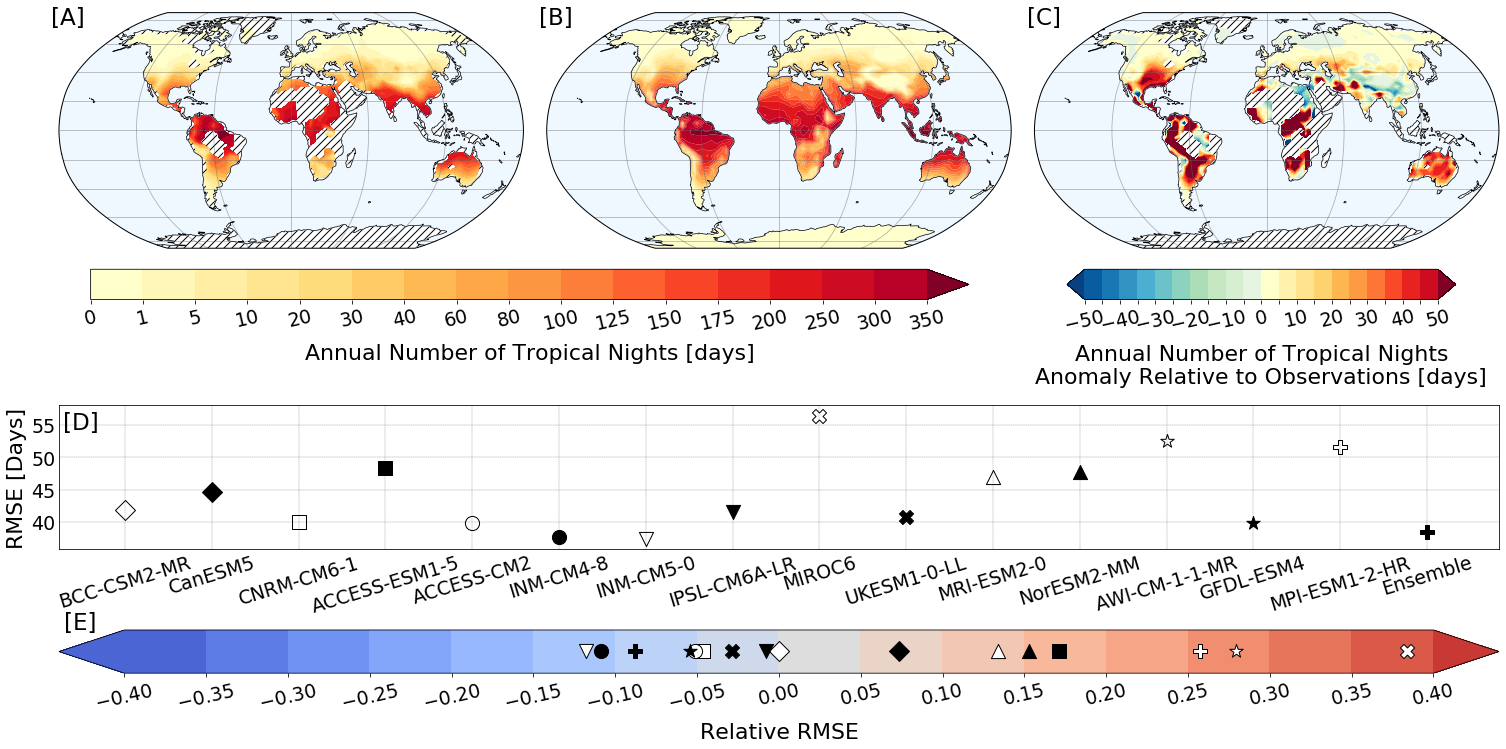

In [8]:
# define map projections and transformations
projection = ccrs.Robinson() # use Robinson projection
transform = ccrs.PlateCarree() # transform from PlateCarree projection

# define figure fontsizes
plot_label_fs = 23
plot_header_fs = 24
tick_label_fs = 19
axis_title_fs = 22
marker_size = 200


########## figure plot base ##########


# create overall figure and base subplots
fig = plt.figure(figsize = (20, 12), constrained_layout = False) # longer than should be as additional colourbar
gs = fig.add_gridspec(nrows = 5, ncols = 6)

# create 1x3 grid across first row of the main base grid
gs_a = gs[0: 3, 0: 6].subgridspec(nrows = 1, ncols = 3)
axs1 = fig.add_subplot(gs_a[0, 0], projection = projection)
axs2 = fig.add_subplot(gs_a[0, 1], projection = projection)
axs3 = fig.add_subplot(gs_a[0, 2], projection = projection)

# create a 1x1 grid across the second row of the main base grid
gs_b = gs[3: 4, 0: 6].subgridspec(nrows = 1, ncols = 1)
axs4 = fig.add_subplot(gs_b[0, 0])

# create a 1x1 grid across the third row of the main base grid
gs_c = gs[4: 5, 0: 6].subgridspec(nrows = 1, ncols = 1)
axs5 = fig.add_subplot(gs_c[0, 0])

# define an axes list
row1 = axs1, axs2, axs3
row2 = axs4
row3 = axs5

# create subplot bases
plot_labels = ['[A]', '[B]', '[C]', '[D]', '[E]']
for i, axs in enumerate(row1):
    axs.coastlines(color = 'black', resolution = '110m', lw = 0.7, zorder = 2)
    axs.gridlines(color = 'dimgrey', alpha = 0.5, zorder = 2)
    axs.add_feature(cartopy.feature.OCEAN, facecolor = 'aliceblue', zorder = 1)
    axs.text(x = 0.02, y = 0.95, s = plot_labels[i], fontsize = plot_label_fs,
             horizontalalignment = 'center', transform = axs.transAxes)
    axs.set_global() # ensures entire global region is plotted
row2.text(x = 0.015, y = 0.83, s = plot_labels[3], fontsize = plot_label_fs,
          horizontalalignment = 'center', transform = row2.transAxes)
row3.text(x = 0.015, y = 0.65, s = plot_labels[4], fontsize = plot_label_fs,
          horizontalalignment = 'center', transform =row3.transAxes)  

# adjust position of subplots to make space for a colourbar and reduce whitespacing
fig.subplots_adjust(bottom = 0.03, top = 1, left = 0., right = 1., wspace = 0.05)


########## observations and multi-model ensemble ##########


# define bounds to group data with; each bin will then be normalised and mapped to a specific colour
bnds1 = np.array([0, 1, 5, 10, 20, 30, 40, 60, 80, 100, 125, 150, 175, 200, 250, 300, 350, 400])

# create custom colourmap; obtain a list of RGB values for each colour to be mapped to
colour_list1 = plt.cm.get_cmap('YlOrRd', len(bnds1))
colours1 = list(colour_list1(np.arange(len(bnds1))))

# create custom colourmap; set colours of values exceeding contour levels set
cmap1 = colors.ListedColormap(colours1[0 :-1], '') # create colourmap object from specified colours
cmap1.set_over(colours1[-1]) # set colour of values exceeding upper contour value
norm1 = colors.BoundaryNorm(boundaries = bnds1,
                            ncolors = len(bnds1) - 1, # colours available to map too; out of bounds do not count
                            clip = False) 

# define the levels/contours for the subplots
lvls1 = np.array([0, 1, 5, 10, 20, 30, 40, 60, 80, 100, 125, 150, 175, 200, 250, 300, 350])

# map colourmap object to first output; to be used to plot colour bar
cm1 = row1[0].contourf(obs_ds.lon, obs_ds.lat, obs_ds,
                       transform = transform, levels = lvls1, norm = norm1,
                       cmap = cmap1, extend = 'max')

# plot remaining outputs
row1[1].contourf(ens_ds.lon, ens_ds.lat, ens_ds,
                 transform = transform, levels = lvls1, norm = norm1,
                 cmap = cmap1, extend = 'max',
                 antialiased = True,
                 alpha = 1)

# plot areas with missing data with hatches; for observational dataset
row1[0].contourf(obs_ds.lon, obs_ds.lat, 
                 obs_ds.where(obs_ds.fillna(-999) != -999, -999), # all nan values now -999
                 transform = transform, alpha = 0, # set plot completely transparent
                 levels = np.array([-999, obs_ds.min()]), # nan value hatched; values above minium valid value not
                 hatches = ['///', None])

# add colourbar
cb_axs1 = fig.add_axes([0.022, 0.52, 0.61, 0.035]) # add an axes to plot colourbar on; [left, bottom, width, height]
cbar1 = fig.colorbar(cm1, cax = cb_axs1, extend = 'max', orientation = 'horizontal',
                     ticks = lvls1)
cbar1.ax.tick_params(labelsize = tick_label_fs, labelrotation = 13)
cbar1.set_label(label = 'Annual Number of Tropical Nights [days]',
                fontsize = axis_title_fs, rotation = 0, labelpad = 10)

    
########## multi-model ensemble observational anomaly ##########


# define bounds to group data with; each bin will then be normalised and mapped to a specific colour
bnds2 = np.array([-1000, -50, -45, -40, -35, -30, -25, -20, -15, -10, -5, 0,
                  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 1000])

# count number of negative and postive bound values
neg_bnds2 = sum(1 for i in bnds2 if i < 0)
pos_bnds2 = len(bnds2) - neg_bnds2

# create custom colourmap; obtain a list of RGB values for each colour to be mapped to
pos_colour_list2 = plt.cm.get_cmap('YlOrRd', pos_bnds2)
neg_colour_list2 = plt.cm.get_cmap('GnBu_r', neg_bnds2 + 1) # so can exclude additional colour to match 
colours2 = np.vstack((neg_colour_list2(np.arange(neg_bnds2 + 1))[: -1], # exclude additional colour
                      pos_colour_list2(np.arange(pos_bnds2))))
colours2 = list(colours2)

# create custom colourmap; set colours of values exceeding contour levels set
cmap2 = colors.ListedColormap(colours2[1 :-1], '') # create colourmap object from specified colours
cmap2.set_over(colours2[-1]) # set colour of values exceeding upper contour value
cmap2.set_under(colours2[0]) # set colours of values exceeding lower contour value
norm2 = colors.BoundaryNorm(boundaries = bnds2,
                            ncolors = len(bnds2) - 2, # colours available to map too; out of bounds do not count
                            clip = False) 

# define the levels/contours for the subplots
lvls2 = np.array([-50, -45, -40, -35, -30, -25, -20, -15, -10, -5, 0,
                  5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

# map colourmap object to output; to be used to plot colour bar
cm2 = row1[2].contourf(obs_anom_ds.lon, obs_anom_ds.lat, obs_anom_ds,
                       transform = transform, levels = lvls2, norm = norm2,
                       cmap = cmap2, extend = 'both')

# plot areas with missing data with hatches; for observational dataset
row1[2].contourf(obs_anom_ds.lon, obs_anom_ds.lat, 
                 obs_anom_ds.where(obs_anom_ds.fillna(-999) != -999, -999), # all nan values now -999
                 transform = transform, alpha = 0, # set plot completely transparent
                 levels = np.array([-999, obs_anom_ds.min()]), # nan value hatched; values above minium valid value not
                 hatches = ['///', None])

# add colourbar
cb_axs2 = fig.add_axes([0.70, 0.52, 0.27, 0.035]) # add an axes to plot colourbar on; [left, bottom, width, height]
cbar2 = fig.colorbar(cm2, cax = cb_axs2, extend = 'both', orientation = 'horizontal',
                     ticks = lvls2)
cbar2.ax.tick_params(labelsize = tick_label_fs, labelrotation = 13)
cbar2.set_label(label = 'Annual Number of Tropical Nights\nAnomaly Relative to Observations [days]',
                fontsize = axis_title_fs, rotation = 0, labelpad = 10)
for label in cbar2.ax.xaxis.get_ticklabels()[1: : 2]: # set only one in two tick labels visible
    label.set_visible(False)


########## individual models and multi-model ensemble absolute RMSEs ##########


# define model names
models = list(rmse_dict.keys())

# define a colour and symbol for each model using dictionary objects
cols_and_symbs = ['white-D', 'black-D', 'white-s', 'black-s', 'white-o',
                  'black-o', 'white-v', 'black-v', 'white-X', 'black-X',
                  'white-^', 'black-^', 'white-*', 'black-*', 'white-P',
                  'black-P'] # distinctive marker for ensmble mean
cols_and_symbs_dict = dict(zip(models, cols_and_symbs))

# define subplot formatting
row2.set_ylabel('RMSE [Days]',  fontsize = axis_title_fs)
row2.set_axisbelow(False)
row2.grid(ls = '-.', lw = '0.2', color = 'black')
row2.tick_params(which = 'major', direction = 'in', top = False, left = False,
                 right = False, bottom = False, labelsize = tick_label_fs)
row2.tick_params(axis = 'x', labelrotation = 17)
#row2.set_ylim([35., 55.])    
row2.locator_params(axis = 'y', nbins = 5) # restrict y-axis to a maxium of 5 intervals

# plot RMSE values
for model in models:
    row2.scatter(model, rmse_dict[f'{model}'], s = marker_size, 
                 c = cols_and_symbs_dict[f'{model}'].split('-')[0], # matches correct symbol for model
                 marker = cols_and_symbs_dict[f'{model}'].split('-')[1], # matches correct colour for model
                 lw = 1, edgecolor = 'black')

    
########## individual models and multi-model ensemble relative RMSEs ##########
    
    
# define subplot formatting
row3.axis('off') # hide axis and wish to overlay onto colourbar
row3.set_xlim([-0.4, 0.4]) # restrict x-axis to line up with colourbar

# plot relative RMSE values
for model in models:
    row3.scatter(rel_rmse_dict[f'{model}'], 1, s = marker_size, 
                 c = cols_and_symbs_dict[f'{model}'].split('-')[0], # matches correct symbol for model
                 marker = cols_and_symbs_dict[f'{model}'].split('-')[1], # matches correct colour for model
                 lw = 1, edgecolor = 'black')

# define bounds for a standalone colourbar to overlay relative RMSE on
bnds3 = np.array([-100, -0.40, -0.35, -0.3, -0.25, -0.2, -0.15, -0.1, -0.05, 0,
                  0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 100])

# create custom colourmap; obtain a list of RGB values for each colour to be mapped to
colour_list3 = plt.cm.get_cmap('coolwarm', len(bnds3))
colours3 = colour_list3(np.arange(len(bnds3)))
colours3 = list(colours3)
                      
# create custom colourmap; set colours of values exceeding contour levels set
cmap3 = colors.ListedColormap(colours3[1 :-1], '') # create colourmap object from specified colours
cmap3.set_over(colours3[-1]) # set colour of values exceeding upper contour value
cmap3.set_under(colours3[0]) # set colours of values exceeding lower contour value
norm3 = colors.BoundaryNorm(boundaries = bnds3,
                            ncolors = len(bnds3) - 2, # colours available to map too; out of bounds do not count
                            clip = False) 

# add standalone colourbar to plot
cb_axs3 = fig.add_axes([0.0, 0.0875, 1.0, 0.05]) # define axis to plot colourbar on; [left, bottom, width, height]
cb_axs3.zorder = -1 # ensure colourbar is plotted behind data
cbar3 = matplotlib.colorbar.ColorbarBase(cb_axs3, cmap = cmap3, norm = norm3, boundaries = bnds3,
                                       extend = 'both', ticks = bnds3,
                                       orientation = 'horizontal')
cbar3.set_label(label = 'Relative RMSE',
             fontsize = axis_title_fs, rotation = 0, labelpad = 10)
cbar3.ax.tick_params(labelsize = tick_label_fs, labelrotation = 13)


########## save figure ##########


# save figure
save_pw = '/home/ucfagtj/DATA/Dissertation/figures/trop_nights/ensemble_vs_obs_and_model_rmses.png'
print(f'Figure saved: {save_pw}')
fig.savefig(save_pw, bbox_inches = 'tight', pad_inches = 0.1)

### Model Evaluation: Individual Model Anomalies

In [9]:
# load data for figure
obs_anom_pw = '/home/ucfagtj/DATA/Dissertation/Data/observations/all_models_trop_nights_observation_anomaly.nc'
obs_anom_ds = xr.open_dataset(obs_anom_pw)
print(obs_anom_ds)
obs_anom_ds.close()

<xarray.Dataset>
Dimensions:                    (lat: 73, lon: 96)
Coordinates:
  * lon                        (lon) float64 -180.0 -176.2 ... 172.5 176.2
  * lat                        (lat) float64 -90.0 -87.5 -85.0 ... 87.5 90.0
Data variables:
    BCC-CSM2-MR_HadEX2_anom    (lat, lon) float64 ...
    CanESM5_HadEX2_anom        (lat, lon) float64 ...
    CNRM-CM6-1_HadEX2_anom     (lat, lon) float64 ...
    ACCESS-ESM1-5_HadEX2_anom  (lat, lon) float64 ...
    ACCESS-CM2_HadEX2_anom     (lat, lon) float64 ...
    INM-CM4-8_HadEX2_anom      (lat, lon) float64 ...
    INM-CM5-0_HadEX2_anom      (lat, lon) float64 ...
    IPSL-CM6A-LR_HadEX2_anom   (lat, lon) float64 ...
    MIROC6_HadEX2_anom         (lat, lon) float64 ...
    UKESM1-0-LL_HadEX2_anom    (lat, lon) float64 ...
    MRI-ESM2-0_HadEX2_anom     (lat, lon) float64 ...
    NorESM2-MM_HadEX2_anom     (lat, lon) float64 ...
    AWI-CM-1-1-MR_HadEX2_anom  (lat, lon) float64 ...
    GFDL-ESM4_HadEX2_anom      (lat, lon) float64 

NameError: name 'abso_data' is not defined

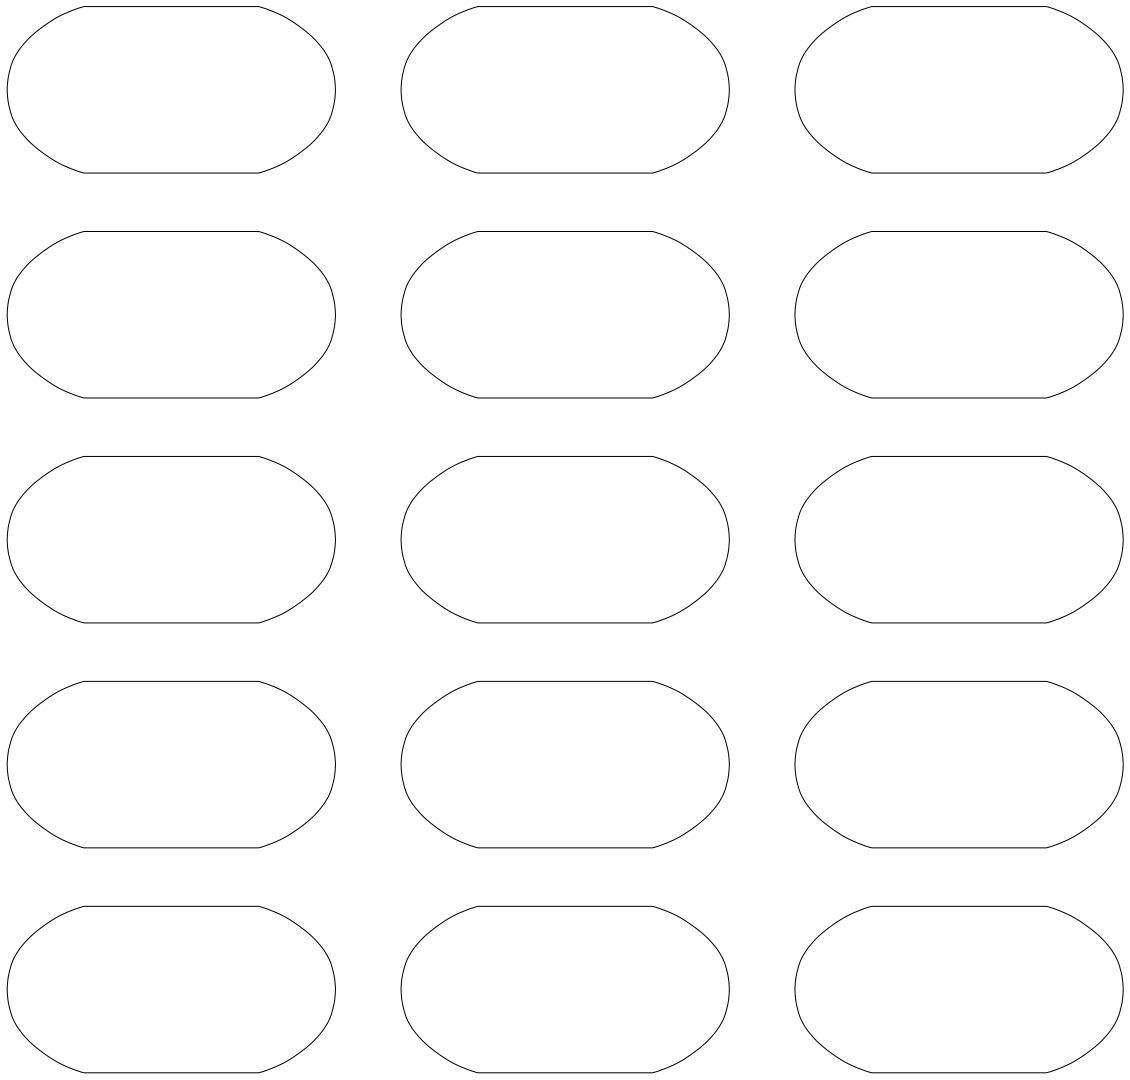

In [10]:
# define map projections and transformations
projection = ccrs.Robinson() # use Robinson projection
transform = ccrs.PlateCarree() # transform from PlateCarree projection

# define figure fontsizes
axis_title_fs = 24
plot_label_fs = 23
tick_label_fs = 23


########## figure plot base ##########


# create figure and axes objects
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize = (20, 20),
                         subplot_kw = {'projection': projection})
axes = axes.flatten(order = 'C') # flatten to a 1D array

# create subplot bases
titles = abso_data.model_index # define list of model names used
label = ['[A]', '[B]', '[C]', '[D]', '[E]', '[F]', '[G]', '[H]', '[I]', '[J]',
         '[K]', '[L]', '[M]', '[N]', '[O]']
for i, axs in enumerate(axes):
    axs.coastlines(color = 'black', resolution = '110m', lw = 0.7, zorder = 2)
    axs.gridlines(color = 'dimgrey', alpha = 0.5, zorder = 2)
    axs.add_feature(cartopy.feature.OCEAN, facecolor = 'aliceblue', zorder = 1)
    axs.set_title(titles[i], fontsize = plot_label_fs, pad = 12)
    axs.text(x = 0.02, y = 1.05, s = label[i], fontsize = plot_label_fs, 
             horizontalalignment = 'center', transform = axs.transAxes)
    axs.set_global() # ensures entire global region is plotted
    
# adjust position of subplots to make space for a colourbar and reduce whitespacing
fig.subplots_adjust(bottom = 0.03, top = 1, left = 0., right = 1., wspace = 0.03, hspace = 0.05)


########## mean annual tropial nights anomaly relative to observations ##########


# define bounds to group data with; each bin will then be normalised and mapped to a specific colour
bnds1 = np.array([-1000, -50, -45, -40, -35, -30, -25, -20, -15, -10, -5, 0,
                  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 1000])

# count number of negative and postive bound values
neg_bnds1 = sum(1 for i in bnds1 if i < 0)
pos_bnds1 = len(bnds1) - neg_bnds1

# create custom colourmap; obtain a list of RGB values for each colour to be mapped to
pos_colour_list1 = plt.cm.get_cmap('YlOrRd', pos_bnds1)
neg_colour_list1 = plt.cm.get_cmap('GnBu_r', neg_bnds1 + 1) # so can exclude additional colour to match 
colours1 = np.vstack((neg_colour_list1(np.arange(neg_bnds1 + 1))[: -1], # exclude additional colour
                      pos_colour_list1(np.arange(pos_bnds1))))
colours1 = list(colours1)

# create custom colourmap; set colours of values exceeding contour levels set
cmap1 = colors.ListedColormap(colours1[1 :-1], '') # create colourmap object from specified colours
cmap1.set_over(colours1[-1]) # set colour of values exceeding upper contour value
cmap1.set_under(colours1[0]) # set colours of values exceeding lower contour value
norm1 = colors.BoundaryNorm(boundaries = bnds1,
                            ncolors = len(bnds1) - 2, # colours available to map too; out of bounds do not count
                            clip = False) 

# define the levels/contours for the subplots
lvls1 = np.array([-50, -45, -40, -35, -30, -25, -20, -15, -10, -5, 0,
                  5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
                 
# define the models with output to plot    
models = obs_anom_ds.models_used

# map colourmap object to first model output; to be used in plot colour bar
cm1 = axes[0].contourf(obs_anom_ds.lon, obs_anom_ds.lat, obs_anom_ds[f'{models[0]}_HadEX2_anom'],
                       transform = transform, levels = lvls1, norm = norm1,
                       cmap = cmap1, extend = 'both')

# plot remaining model outputs
for i, axs in enumerate(axes[1: ]):
    
    # define model used in iteration
    model = models[i + 1] # as first model output already plotted
    axs.contourf(obs_anom_ds.lon, obs_anom_ds.lat, obs_anom_ds[f'{model}_HadEX2_anom'],
                 transform = transform, levels = lvls1, norm = norm1,
                 cmap = cmap1, extend = 'both')
    
# plot areas with missing data with hatches
for i, model in enumerate(models):
    axes[i].contourf(obs_anom_ds.lon, obs_anom_ds.lat, 
                     obs_anom_ds[f'{model}_HadEX2_anom'].where(obs_anom_ds[f'{model}_HadEX2_anom'].fillna(-999) != -999, -999),
                     transform = transform, alpha = 0, # set plot completely transparent
                     levels = np.array([-999, obs_anom_ds[f'{model}_HadEX2_anom'].min()]), 
                     hatches = ['///', None]) # nan value hatched; values above minium valid value not
    
# add colourbar
cb_axs1 = fig.add_axes([0.075, 0., 0.85, 0.02]) # add an axes to plot colourbar on; [left, bottom, width, height]
cbar1 = fig.colorbar(cm1, cax = cb_axs1, extend = 'both',
                     orientation = 'horizontal', ticks = lvls1)
cbar1.ax.tick_params(labelsize = tick_label_fs)
cbar1.set_label(label = 'Annual Number of Tropical Nights Anomaly Relative to Observations [days]',
                fontsize = axis_title_fs, rotation = 0, labelpad = 10)


########## save figure ##########


# save figure
save_pw = '/home/ucfagtj/DATA/Dissertation/figures/trop_nights/observational_anomaly_all_models.png'
print(f'Figure saved: {save_pw}')
fig.savefig(save_pw, bbox_inches = 'tight', pad_inches = 0.1)